In [1]:
import numpy as np
import pandas as pd
import nltk
import pickle
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from textblob import TextBlob
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
%matplotlib inline

In [2]:
df = pd.read_pickle('df_clean.pkl')

In [3]:
df = df[['rating','lemmatized']]

In [4]:
df

,rating,lemmatized
0,5.0,"[customer, service/call, centre, mainly, tech,..."
1,5.0,"[customer, service/call, centre, mainly, tech,..."
2,4.0,"[management, great, culture, awesome, people, ..."
3,2.0,"[work, culture, change, lot, politics, managem..."
4,3.0,"[typical, day, work, company, fast, pace, alwa..."
...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy..."
4138,5.0,"[glad, today, login, herei, like, muchit, ver,..."
4139,3.0,"[google, shouldnt, participate, project, drago..."
4140,5.0,"[google, awesome, place, work, hour, pretty, t..."


In [5]:
df['lemma_str']=[' '.join(map(str,l)) for l in df['lemmatized']]

In [6]:
df['sentiment']=df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
#nltk.download('vader_lexicon')

In [8]:
#add sentiment anaylsis columns
import nltk.sentiment.vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
df["sentiments"] = df["lemma_str"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([df.drop(['sentiments'], axis=1), df['sentiments'].apply(pd.Series)], axis=1)

In [9]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["lemma_str"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["lemma_str"].apply(lambda x: len(x.split(" ")))

In [93]:
reviews_df.tail(80)

,rating,lemmatized,lemma_str,sentiment,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
4062,3.0,"[google, seem, mostly, hire, temporary, vendor...",google seem mostly hire temporary vendor contr...,0.021667,0.051,0.949,0.000,-0.1027,186,27,0.036424,-0.058378,0.055685,-0.148047,0.013873
4063,5.0,"[quality, quantity, productivity, end, result,...",quality quantity productivity end result absol...,0.400000,0.000,0.761,0.239,0.6590,114,15,-0.033794,-0.154948,0.013771,-0.040425,-0.145882
4064,5.0,"[great, pay, great, people, company, give, hig...",great pay great people company give high level...,0.485000,0.119,0.548,0.333,0.9001,195,30,-0.026391,-0.235729,-0.021610,0.115246,0.141581
4065,4.0,"[good, work, life, balance, fair, pay, overall...",good work life balance fair pay overall positi...,0.365909,0.046,0.359,0.595,0.9501,128,18,-0.080502,-0.029929,-0.101374,0.141499,-0.107347
4066,5.0,"[overall, would, rate, work, google, 5, star, ...",overall would rate work google 5 star fun work...,0.109091,0.000,0.875,0.125,0.5106,145,25,0.101679,-0.074759,0.094895,-0.028532,-0.049377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667,0.000,0.400,0.600,0.9584,105,17,-0.013413,-0.150821,-0.118317,-0.033106,-0.111030
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000,0.000,0.395,0.605,0.9153,80,14,0.022348,-0.039801,0.081699,0.042472,-0.086752
4139,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,0.000,0.653,0.347,0.7096,123,16,-0.060806,-0.049870,-0.067025,-0.067459,-0.074612
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222,0.101,0.533,0.367,0.8402,138,23,-0.019357,-0.041388,0.056855,0.023236,-0.037297


In [91]:
reviews_df[reviews_df["nb_words"] >= 10].sort_values("pos", ascending = True)[["lemma_str", "pos"]].head(10)

,lemma_str,pos
4062,google seem mostly hire temporary vendor contr...,0.0
1731,google seem mostly hire temporary vendor contr...,0.0
3684,google seem mostly hire temporary vendor contr...,0.0
1710,google seem mostly hire temporary vendor contr...,0.0
3159,google seem mostly hire temporary vendor contr...,0.0
807,google seem mostly hire temporary vendor contr...,0.0
1689,google seem mostly hire temporary vendor contr...,0.0
157,google seem mostly hire temporary vendor contr...,0.0
3180,google seem mostly hire temporary vendor contr...,0.0
1668,google seem mostly hire temporary vendor contr...,0.0


In [12]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["lemma_str"].apply(lambda x: x.split(" ")))]

In [13]:
documents

[TaggedDocument(words=['customer', 'service/call', 'centre', 'mainly', 'tech', 'support', 'great', 'learning', 'different', 'apps', 'come', 'market'], tags=[0]),
 TaggedDocument(words=['customer', 'service/call', 'centre', 'mainly', 'tech', 'support', 'great', 'learning', 'different', 'apps', 'come', 'market'], tags=[1]),
 TaggedDocument(words=['management', 'great', 'culture', 'awesome', 'people', 'young', 'motivate', 'also', 'share', 'best', 'practice', 'con', 'ive', 'talk', 'others', 'sell', 'adwords', 'live', 'make', 'much'], tags=[2]),
 TaggedDocument(words=['work', 'culture', 'change', 'lot', 'politics', 'management', 'unwilling', 'step', 'resolve', 'issue', 'engineer', 'leave', 'burden'], tags=[3]),
 TaggedDocument(words=['typical', 'day', 'work', 'company', 'fast', 'pace', 'always', 'different', 'thing', 'like', 'instal', 'new', 'phone', 'fix', 'client', 'support'], tags=[4]),
 TaggedDocument(words=['great', 'company', 'work', 'excellenent', 'people', 'wonder', 'ful', 'work', '

In [14]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["lemma_str"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["lemma_str"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [15]:
reviews_df

,rating,lemmatized,lemma_str,sentiment,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,0.000,0.595,0.405,0.7783,90,12,-0.022248,0.014122,0.064893,-0.070071,0.014202
1,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,0.000,0.595,0.405,0.7783,90,12,0.042237,0.035963,0.024002,-0.027664,0.082900
2,4.0,"[management, great, culture, awesome, people, ...",management great culture awesome people young ...,0.539394,0.000,0.466,0.534,0.9531,127,20,-0.004047,-0.663661,0.050294,-0.069465,-0.169382
3,2.0,"[work, culture, change, lot, politics, managem...",work culture change lot politics management un...,0.000000,0.246,0.599,0.156,-0.1280,94,13,-0.259017,-0.949886,-0.206407,-0.197930,0.054466
4,3.0,"[typical, day, work, company, fast, pace, alwa...",typical day work company fast pace always diff...,0.042424,0.000,0.729,0.271,0.6369,98,16,0.133592,-0.269990,-0.144804,0.110813,0.022765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667,0.000,0.400,0.600,0.9584,105,17,-0.013413,-0.150821,-0.118317,-0.033106,-0.111030
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000,0.000,0.395,0.605,0.9153,80,14,0.022348,-0.039801,0.081699,0.042472,-0.086752
4139,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,0.000,0.653,0.347,0.7096,123,16,-0.060806,-0.049870,-0.067025,-0.067459,-0.074612
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222,0.101,0.533,0.367,0.8402,138,23,-0.019357,-0.041388,0.056855,0.023236,-0.037297


In [16]:
reviews_df.tail(10)

,rating,lemmatized,lemma_str,sentiment,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
4132,5.0,"[sale, contractor, google, treat, 2nd, class, ...",sale contractor google treat 2nd class citizen...,0.033333,0.000,0.651,0.349,0.7579,114,17,-0.032453,0.011467,0.179960,0.044198,0.060989
4133,5.0,"[well, take, care, train, module, equipment, t...",well take care train module equipment tool sen...,0.200000,0.056,0.635,0.310,0.7506,114,20,0.143592,-0.116822,0.037520,0.058920,-0.049659
4134,4.0,"[home, job, get, pay, create, income, base, su...",home job get pay create income base success vi...,0.200000,0.035,0.568,0.398,0.9403,189,29,0.045654,-0.070197,-0.112742,-0.056279,0.003355
4135,5.0,"[best, site, solve, big, problem, easily, life...",best site solve big problem easily life dream ...,0.608333,0.164,0.394,0.442,0.8481,131,20,-0.038409,-0.085797,0.027462,-0.014956,0.046490
4136,5.0,"[diligent, customer, service, representative, ...",diligent customer service representative bring...,0.183333,0.000,0.699,0.301,0.8807,270,30,0.039552,-0.189784,-0.054972,-0.092882,-0.042326
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667,0.000,0.400,0.600,0.9584,105,17,-0.013413,-0.150821,-0.118317,-0.033106,-0.111030
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000,0.000,0.395,0.605,0.9153,80,14,0.022348,-0.039801,0.081699,0.042472,-0.086752
4139,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,0.000,0.653,0.347,0.7096,123,16,-0.060806,-0.049870,-0.067025,-0.067459,-0.074612
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222,0.101,0.533,0.367,0.8402,138,23,-0.019357,-0.041388,0.056855,0.023236,-0.037297
4141,5.0,"[google, amaze, work, environment, lot, creati...",google amaze work environment lot creative spa...,0.525000,0.000,0.428,0.572,0.9545,124,18,-0.099137,-0.025828,-0.174210,-0.021203,-0.019818


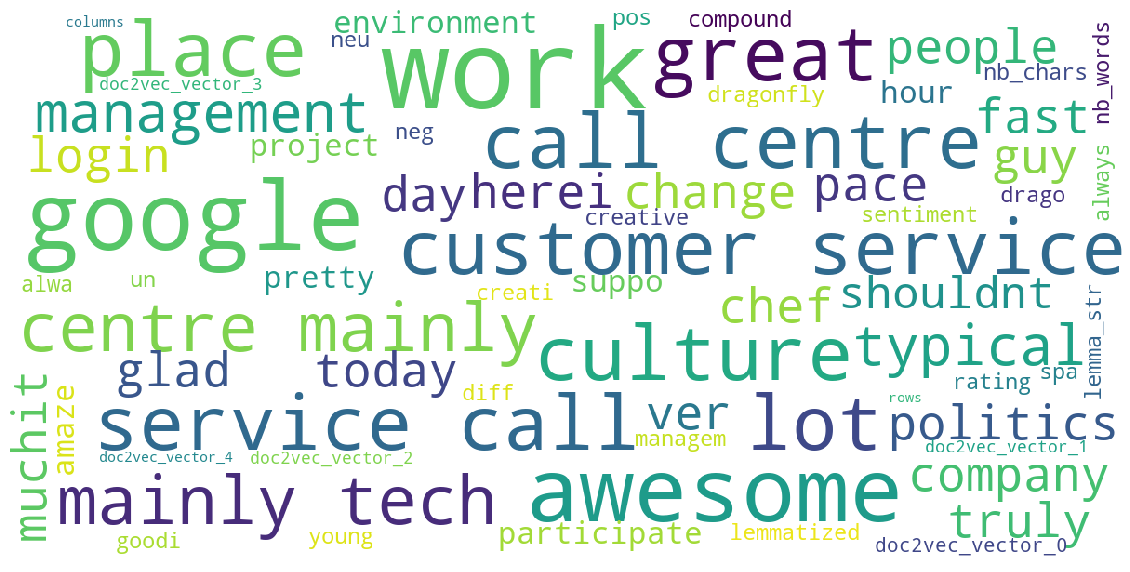

In [17]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df)

In [18]:

# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 10].sort_values("pos", ascending = False)[["lemma_str", "pos"]].head(3)

,lemma_str,pos
6,google talented skilled caring people passion ...,0.620
10,great place wonderful people wonderful environ...,0.609
3487,glad today login herei like muchit ver goodi h...,0.605


In [19]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["lemma_str", "neg"]].head(25)


,lemma_str,neg
3,work culture change lot politics management un...,0.246
18,completely different movie perk excite first p...,0.218
733,best site solve big problem easily life dream ...,0.164
2140,best site solve big problem easily life dream ...,0.164
1489,best site solve big problem easily life dream ...,0.164
2098,best site solve big problem easily life dream ...,0.164
607,best site solve big problem easily life dream ...,0.164
2833,best site solve big problem easily life dream ...,0.164
3778,best site solve big problem easily life dream ...,0.164
586,best site solve big problem easily life dream ...,0.164


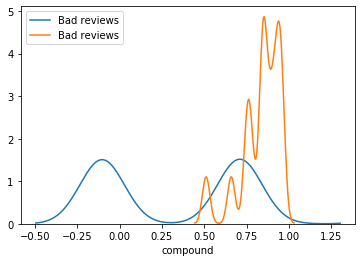

In [96]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [3, 5]:
    subset = reviews_df[reviews_df['rating'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

In [97]:
# feature selection
label = "rating"
ignore_cols = [label, "lemmatized", "lemma_str"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

In [98]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
0,sentiment,0.200968
4,compound,0.200547
2,neu,0.162105
3,pos,0.119433
5,nb_chars,0.106793
1,neg,0.097619
6,nb_words,0.055715
9,doc2vec_vector_2,0.023144
10,doc2vec_vector_3,0.011662
11,doc2vec_vector_4,0.009270


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


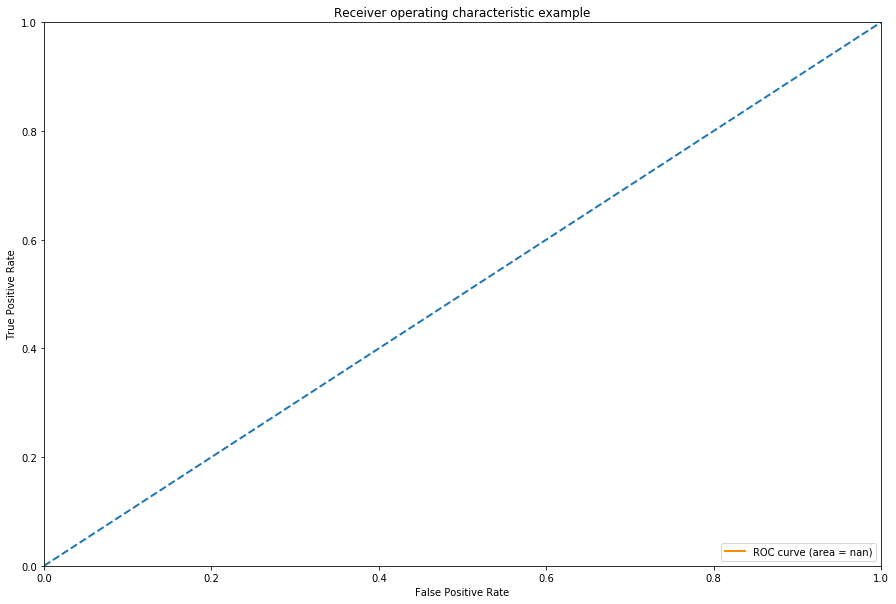

In [99]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [101]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

ValueError: multiclass format is not supported

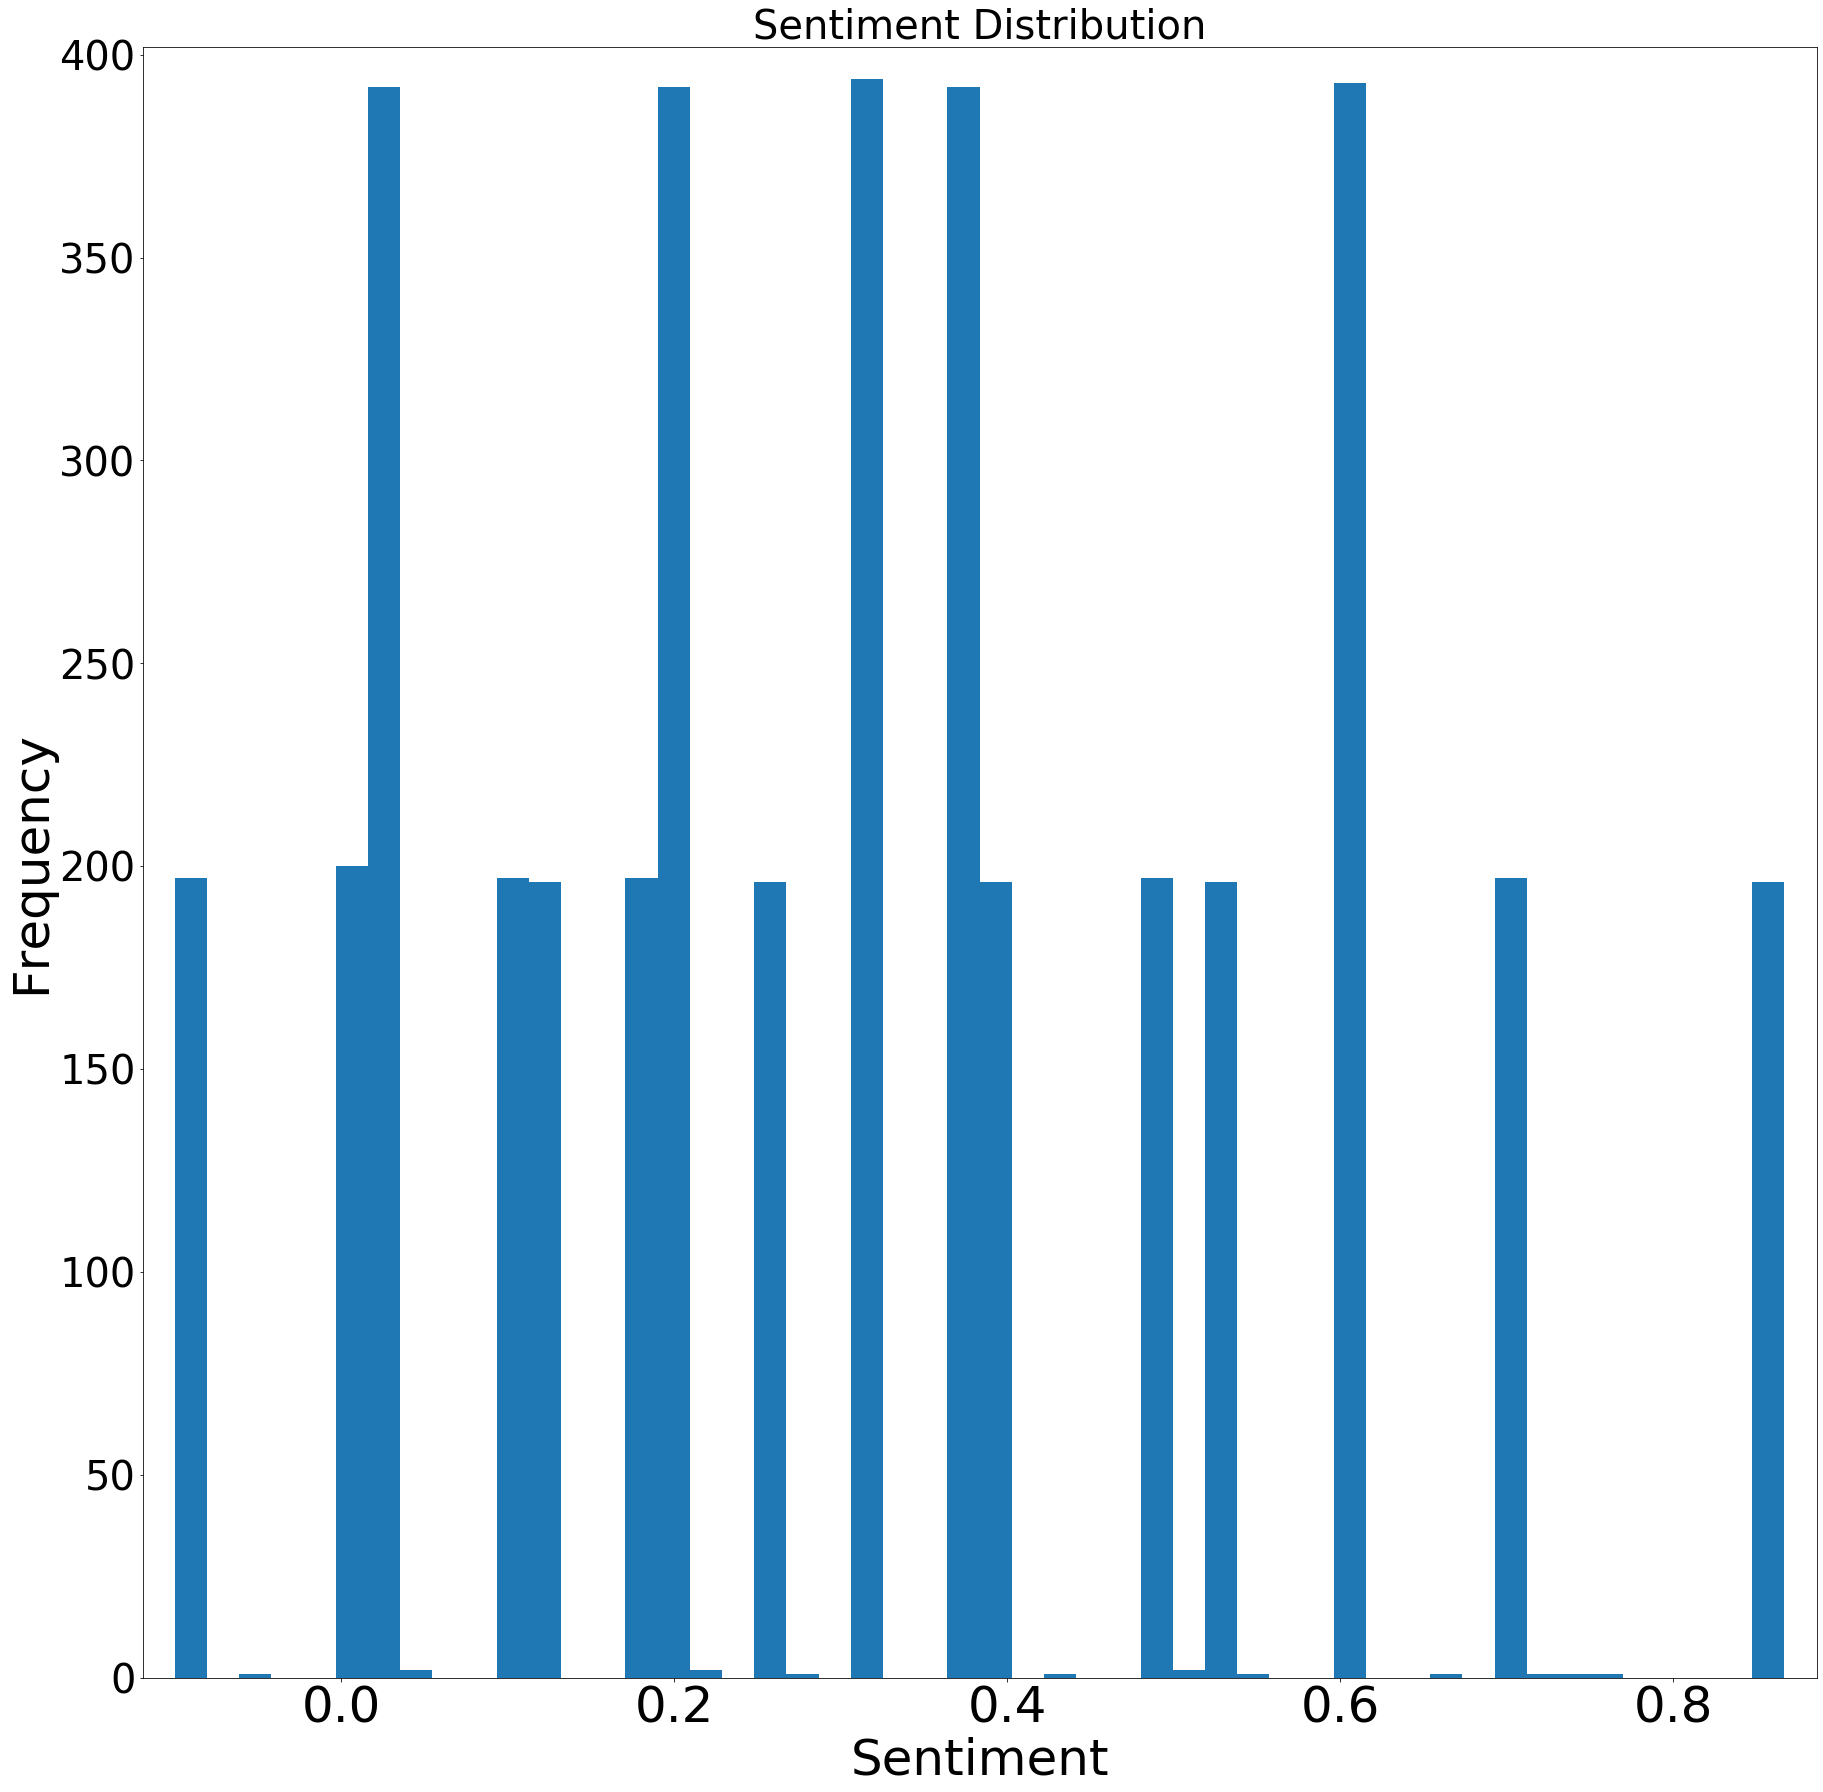

In [20]:
plt.figure(figsize=(30,30))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'],bins=50)
plt.title('Sentiment Distribution', fontsize=40)
plt.show()

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 8 Text yticklabel objects>)

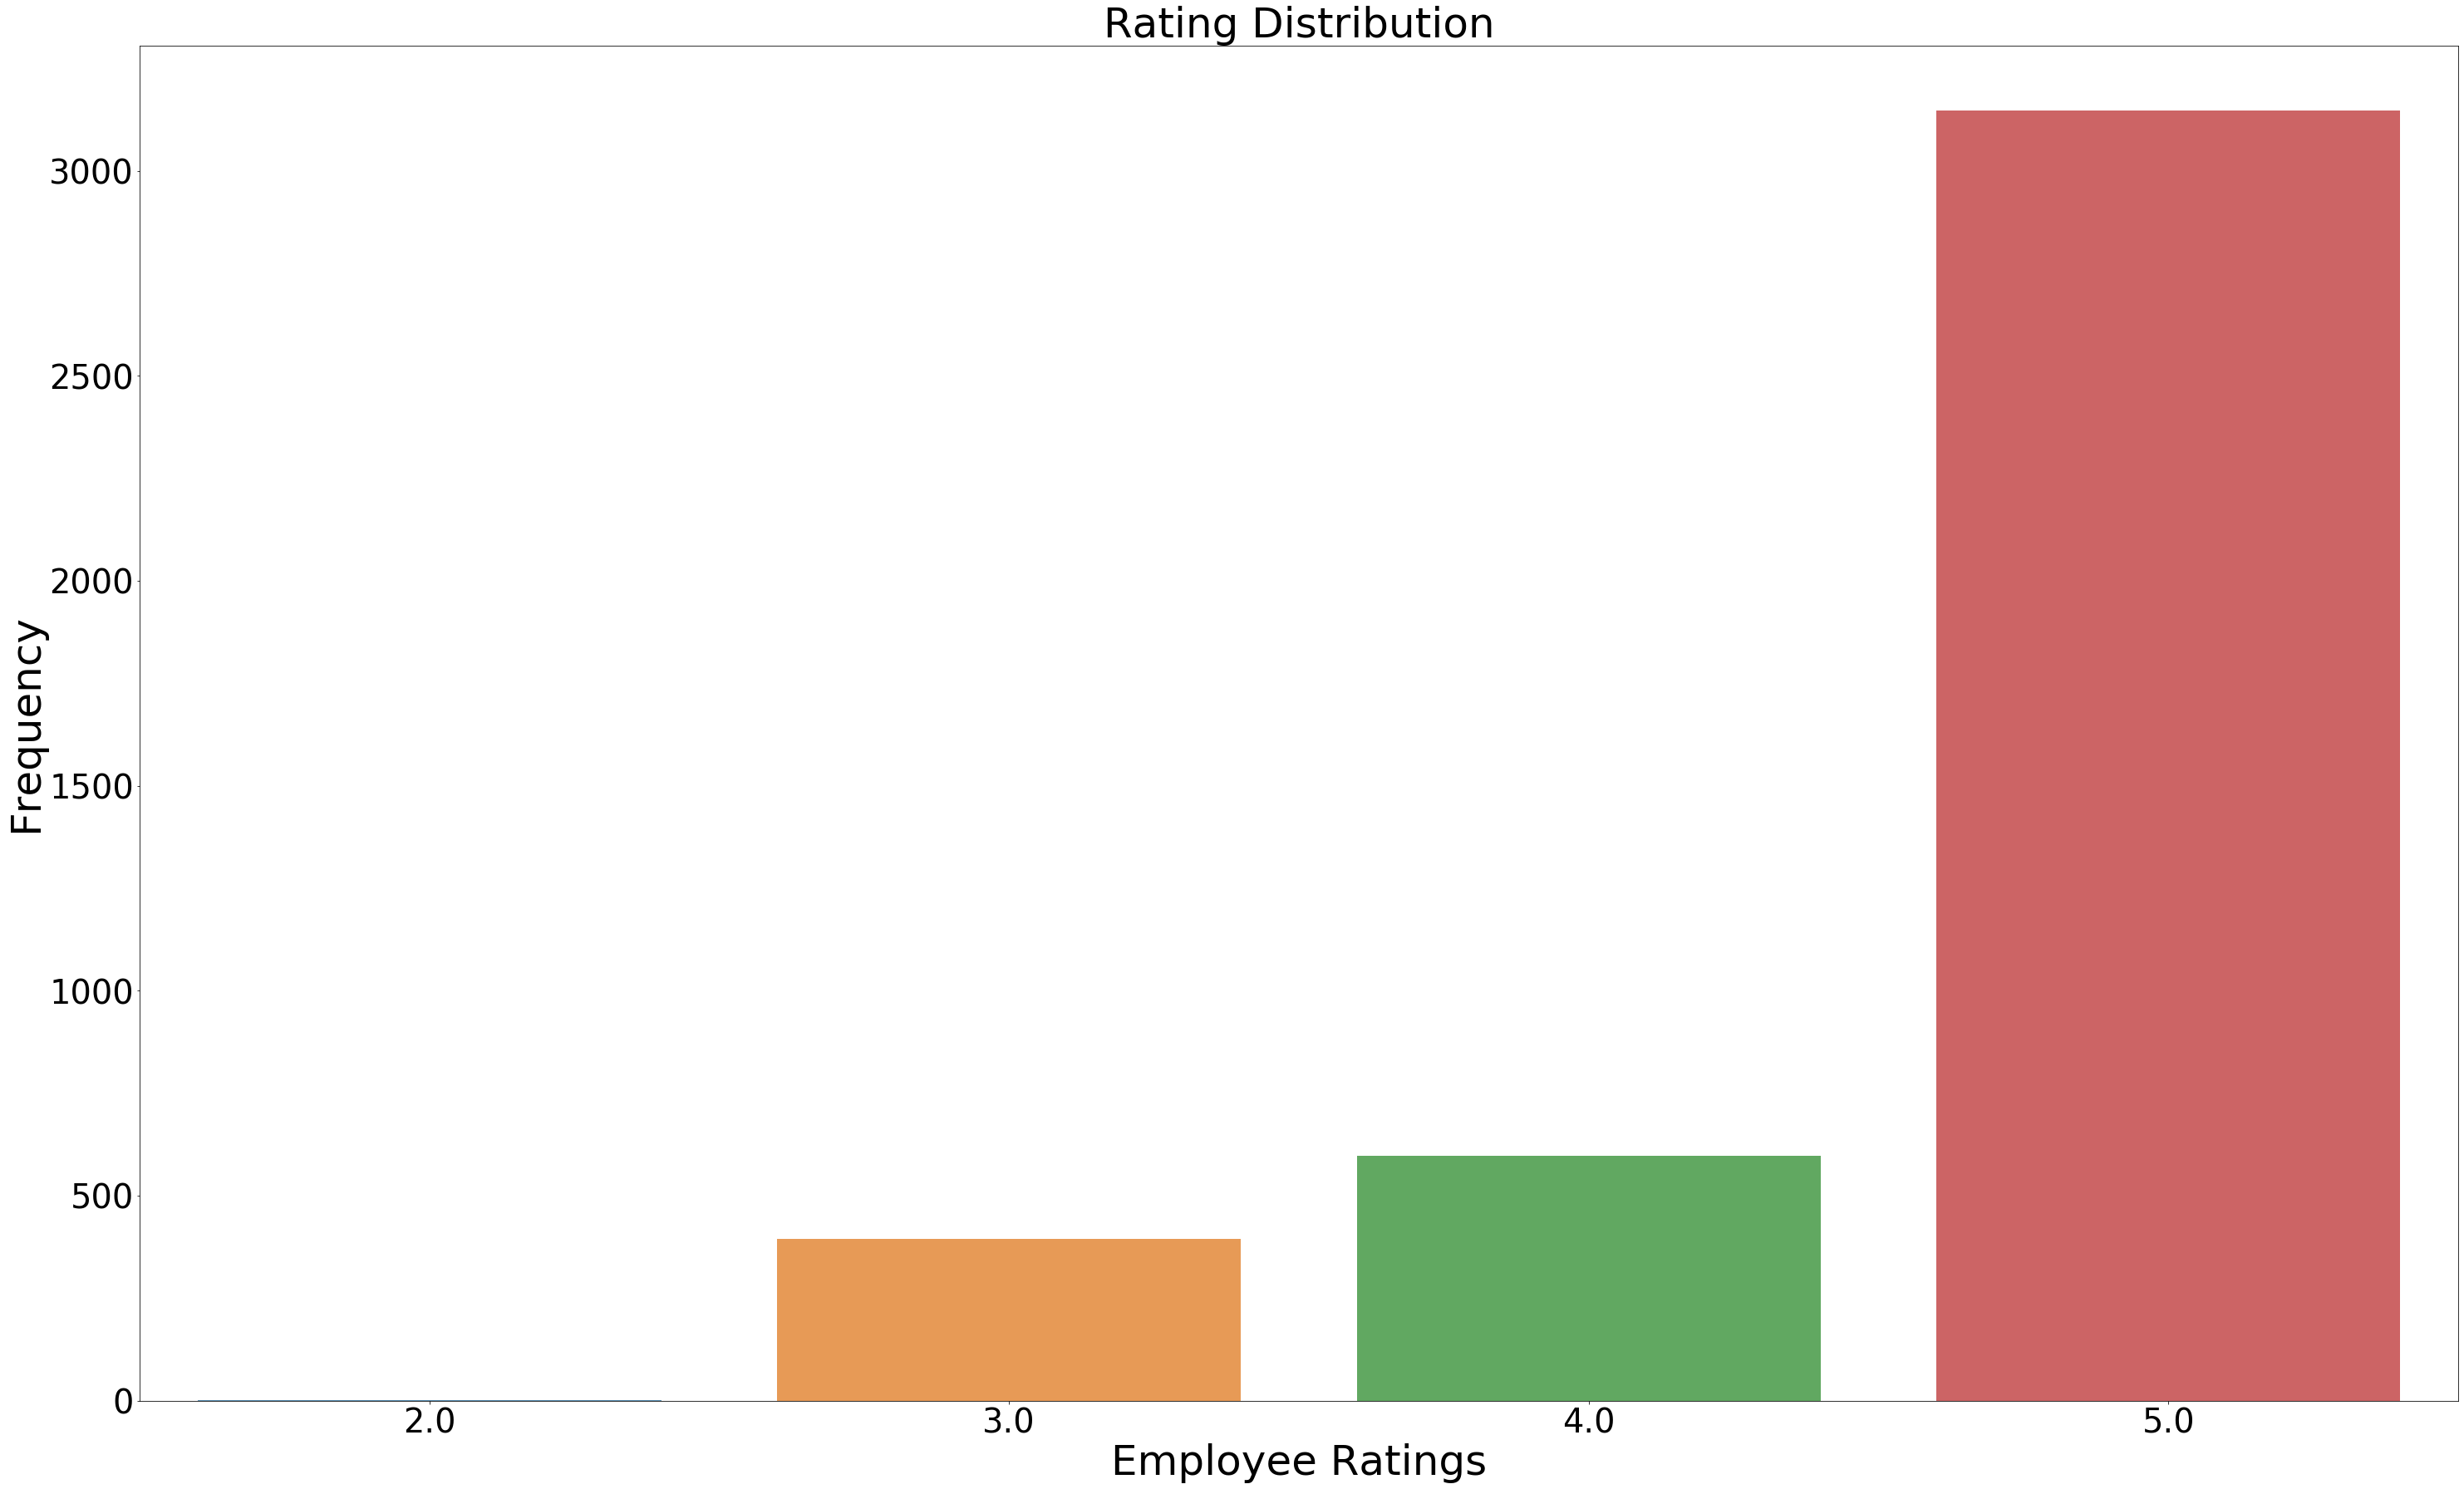

In [21]:
x=df.rating.value_counts()
y=x.sort_index(axis=0)
plt.figure(figsize=(50,30))
sns.barplot(x.index,x.values,alpha=0.8)
plt.title('Rating Distribution',fontsize=50)
plt.xlabel('Employee Ratings',fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency',fontsize=50)
plt.yticks(fontsize=40)

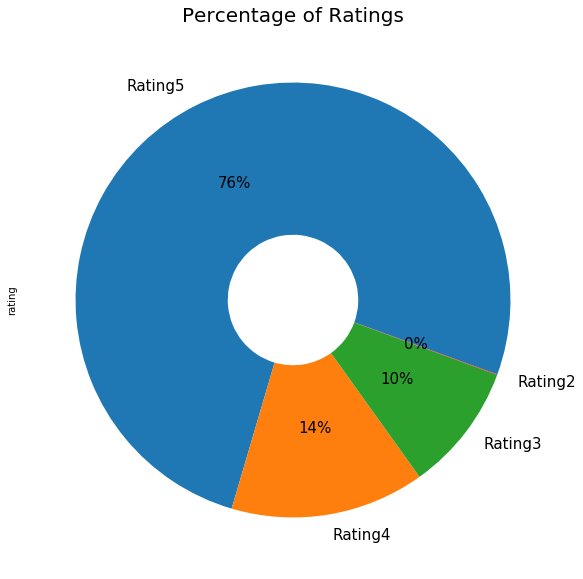

In [22]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings',fontsize=20)
df.rating.value_counts().plot(kind='pie',labels=['Rating5','Rating4','Rating3','Rating2','Rating1'],
                             wedgeprops=dict(width=.7),autopct='%1.0f%%',startangle=-20,
                             textprops={'fontsize':15})

In [23]:
df['review_len'] =df['lemmatized'].astype(str).apply(len)
df['word_count'] =df['lemmatized'].apply(lambda x:len(str(x).split()))

In [24]:
a= (df['rating']==2.0).value_counts()

In [25]:
df.filter((df['rating']==2.0))

""
0
1
2
3
4
...
4137
4138
4139
4140


In [26]:
df["rating"].value_counts(normalize = True)

5.0    0.760019
4.0    0.144375
3.0    0.095123
2.0    0.000483
Name: rating, dtype: float64

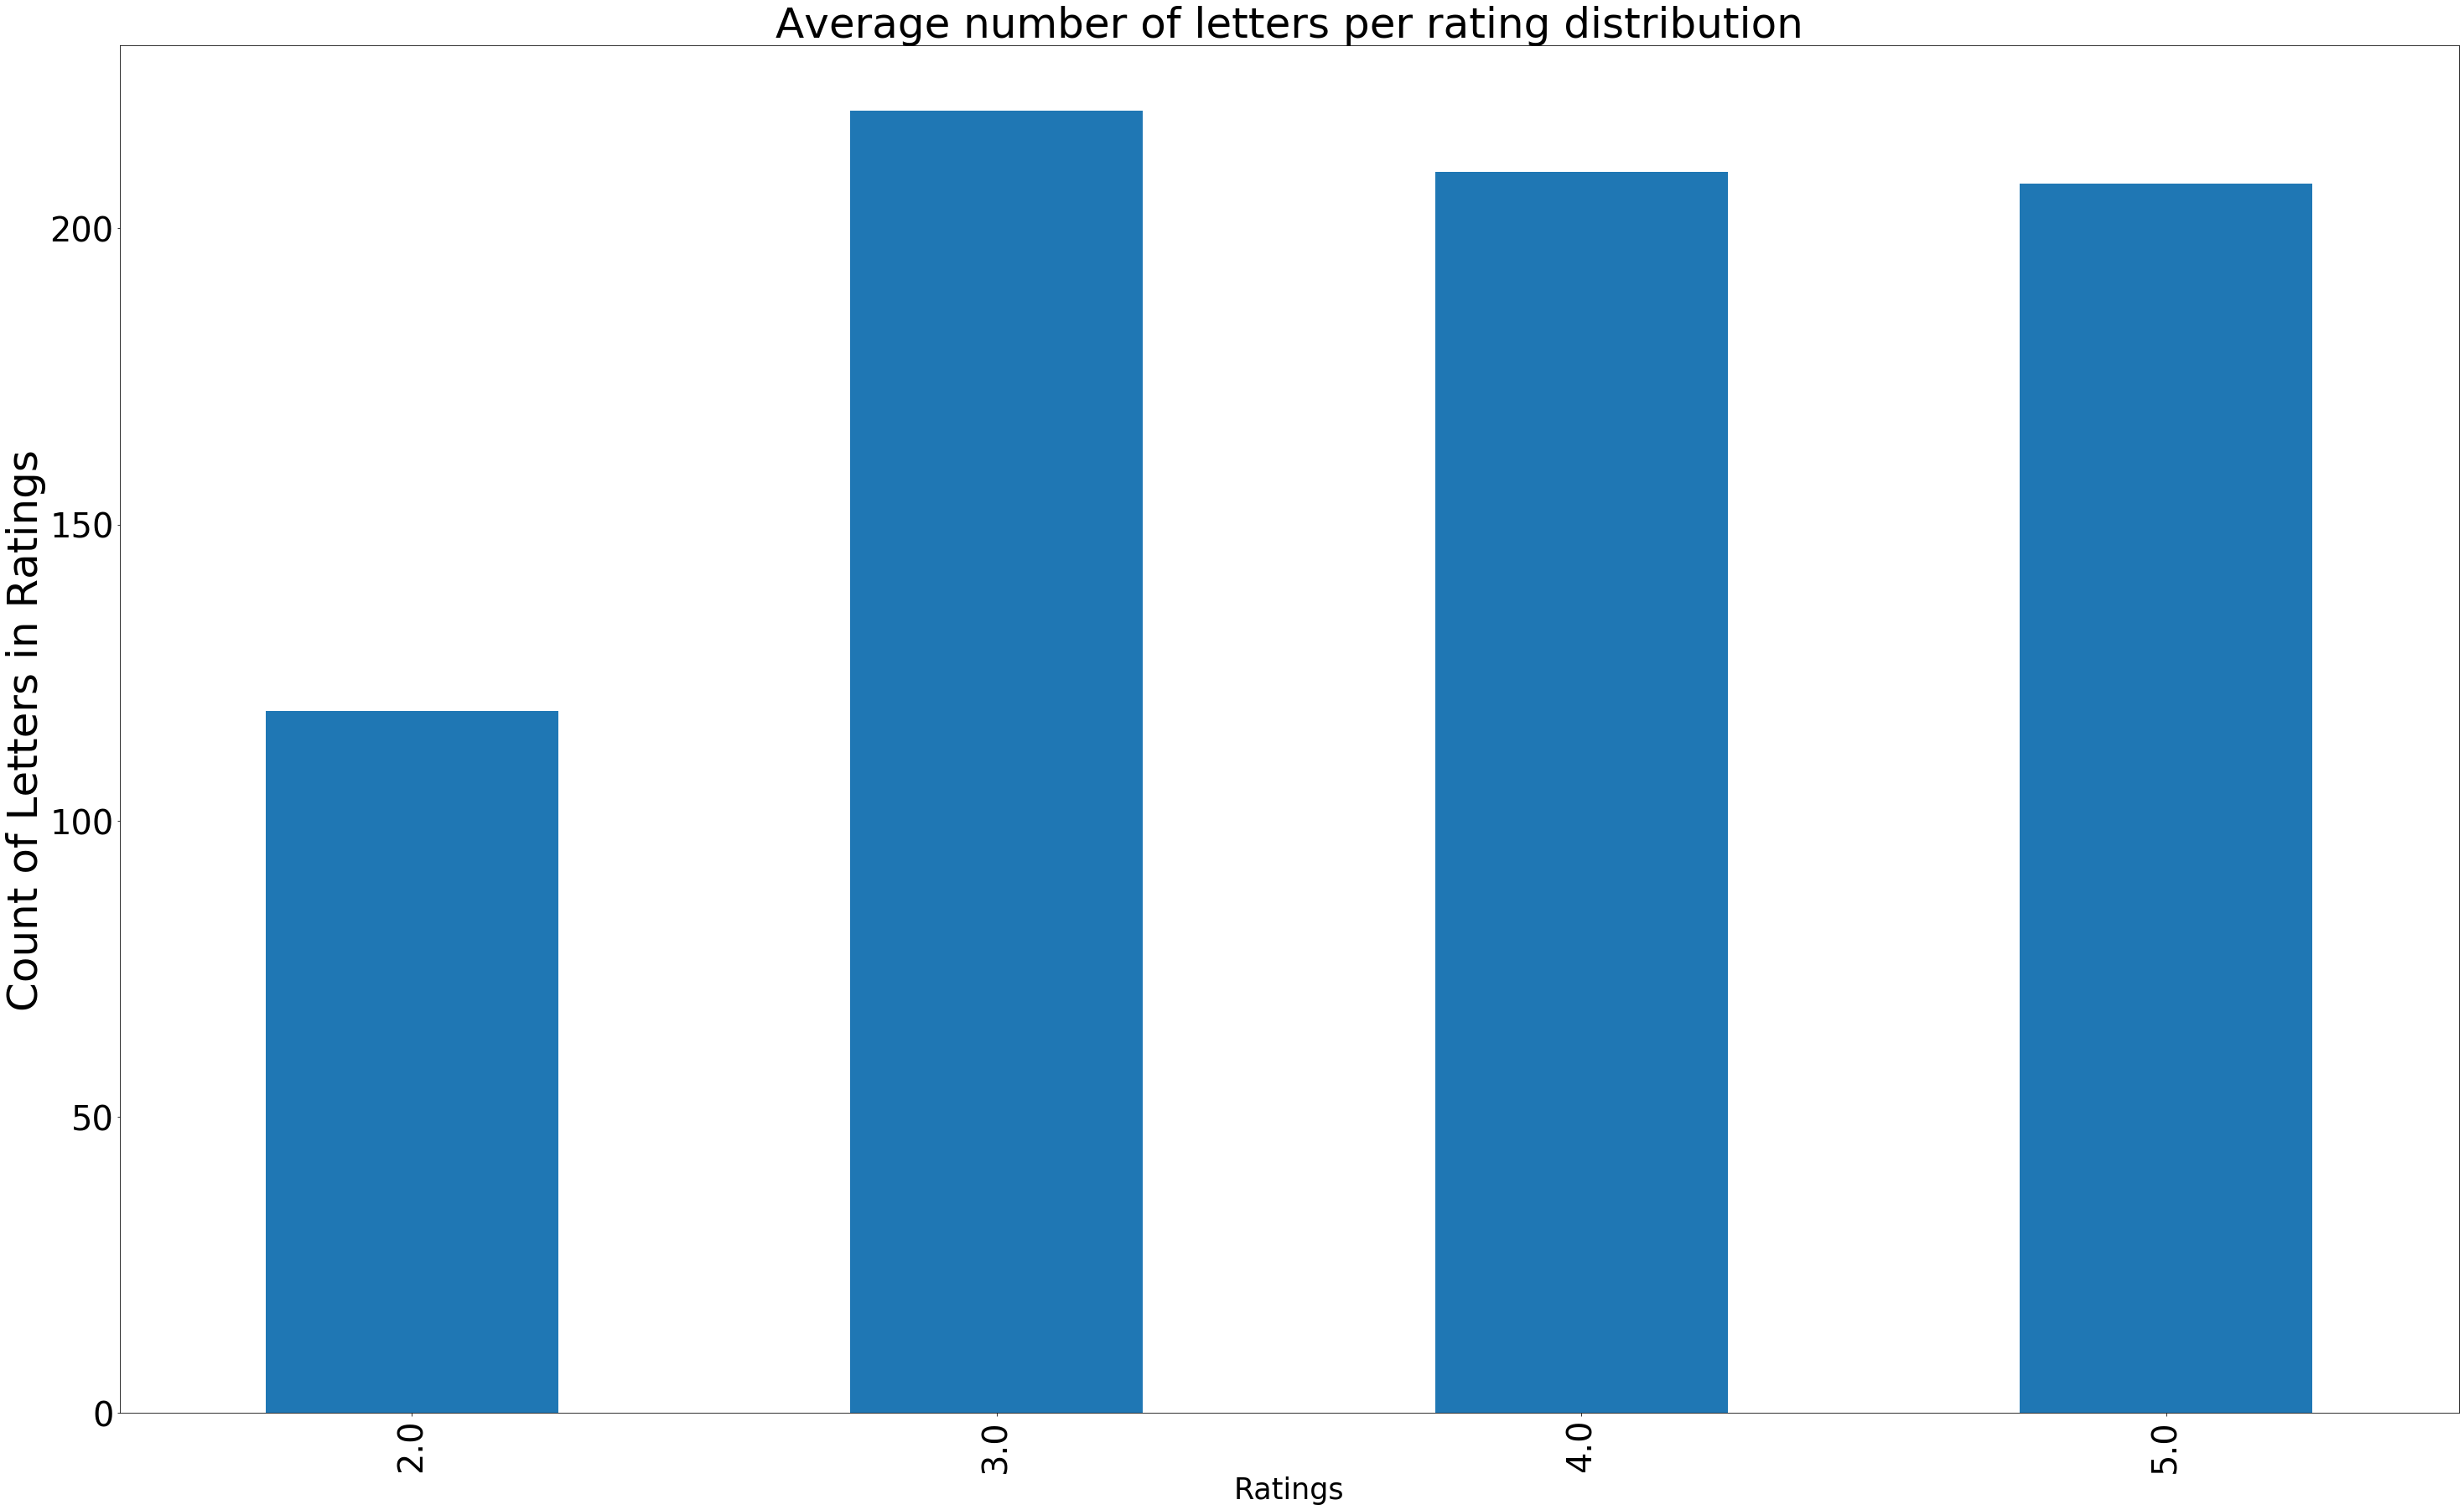

In [27]:
letter_avg=df.groupby('rating')['review_len'].mean().plot(kind='bar',figsize=(50,30))
plt.title('Average number of letters per rating distribution',fontsize=50)
plt.xlabel('Ratings',fontsize=35)
plt.xticks(fontsize=40)
plt.ylabel('Count of Letters in Ratings',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

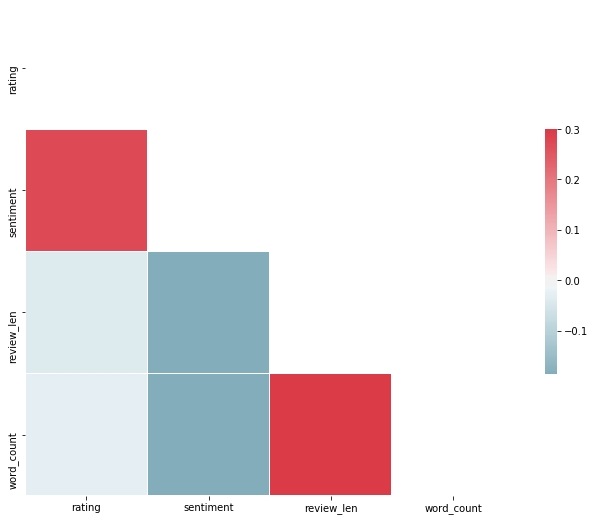

In [28]:
correlation=df[['rating', 'sentiment', 'review_len', 'word_count']].corr()
#mask=np.zeros_like(correlation,dtype=np.bool)
#mask[np.triu_indices_from(mask)]=True
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#plt.figure(figsize=(50,30))
#plt.xticks(fontsize=30)
#plt.yticks(fontsize=30)
sns.heatmap(correlation,cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},mask=mask)

In [29]:
words=df['lemmatized']
allwords=[]
for wordlist in words:
    allwords+= wordlist

In [30]:
mostcommon=FreqDist(allwords).most_common(100)

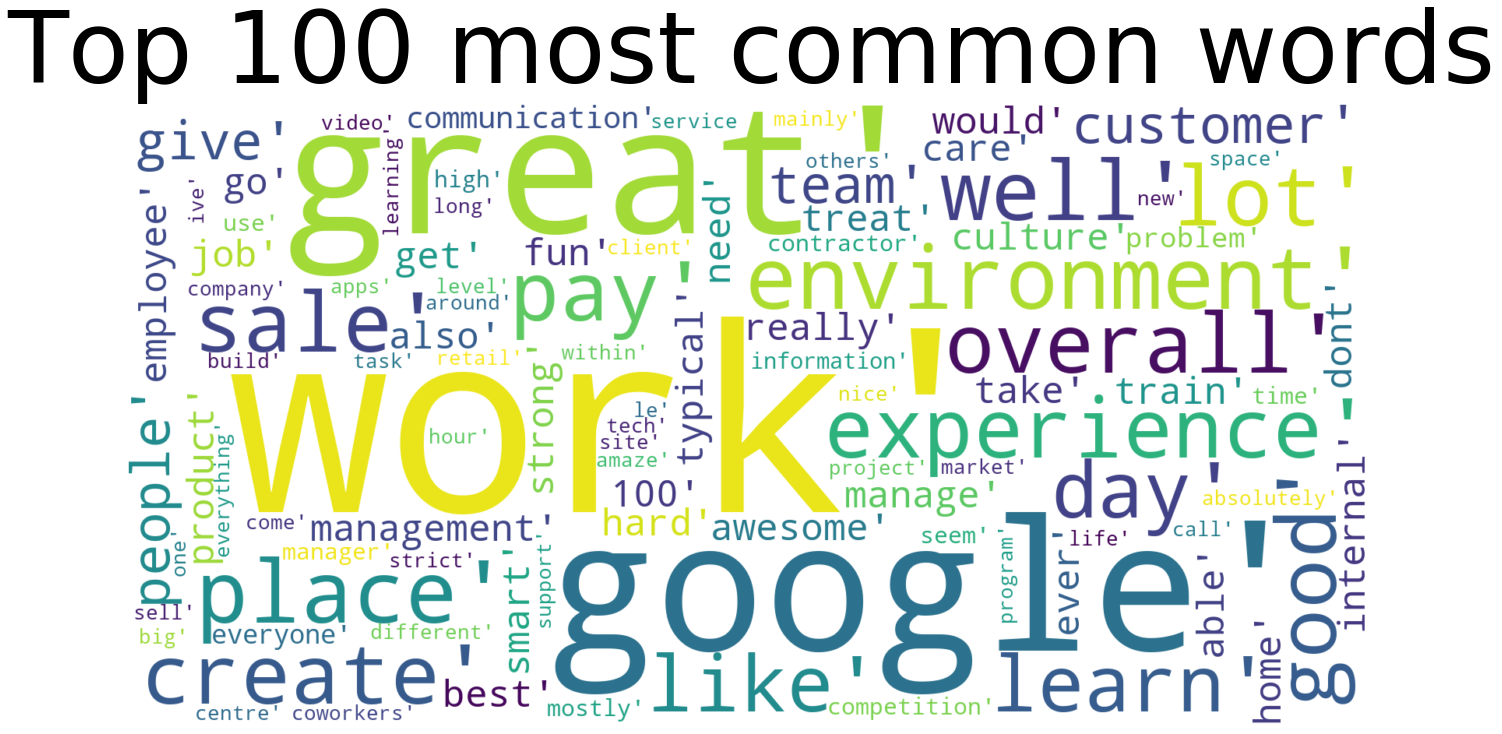

In [31]:
wordcloud=WordCloud(width=1600,height=800,background_color='white').generate(str(mostcommon))
fig=plt.figure(figsize=(30,10),facecolor='white')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 most common words', fontsize=100)

plt.tight_layout(pad=0)
plt.show()

# Imbalanced Classes

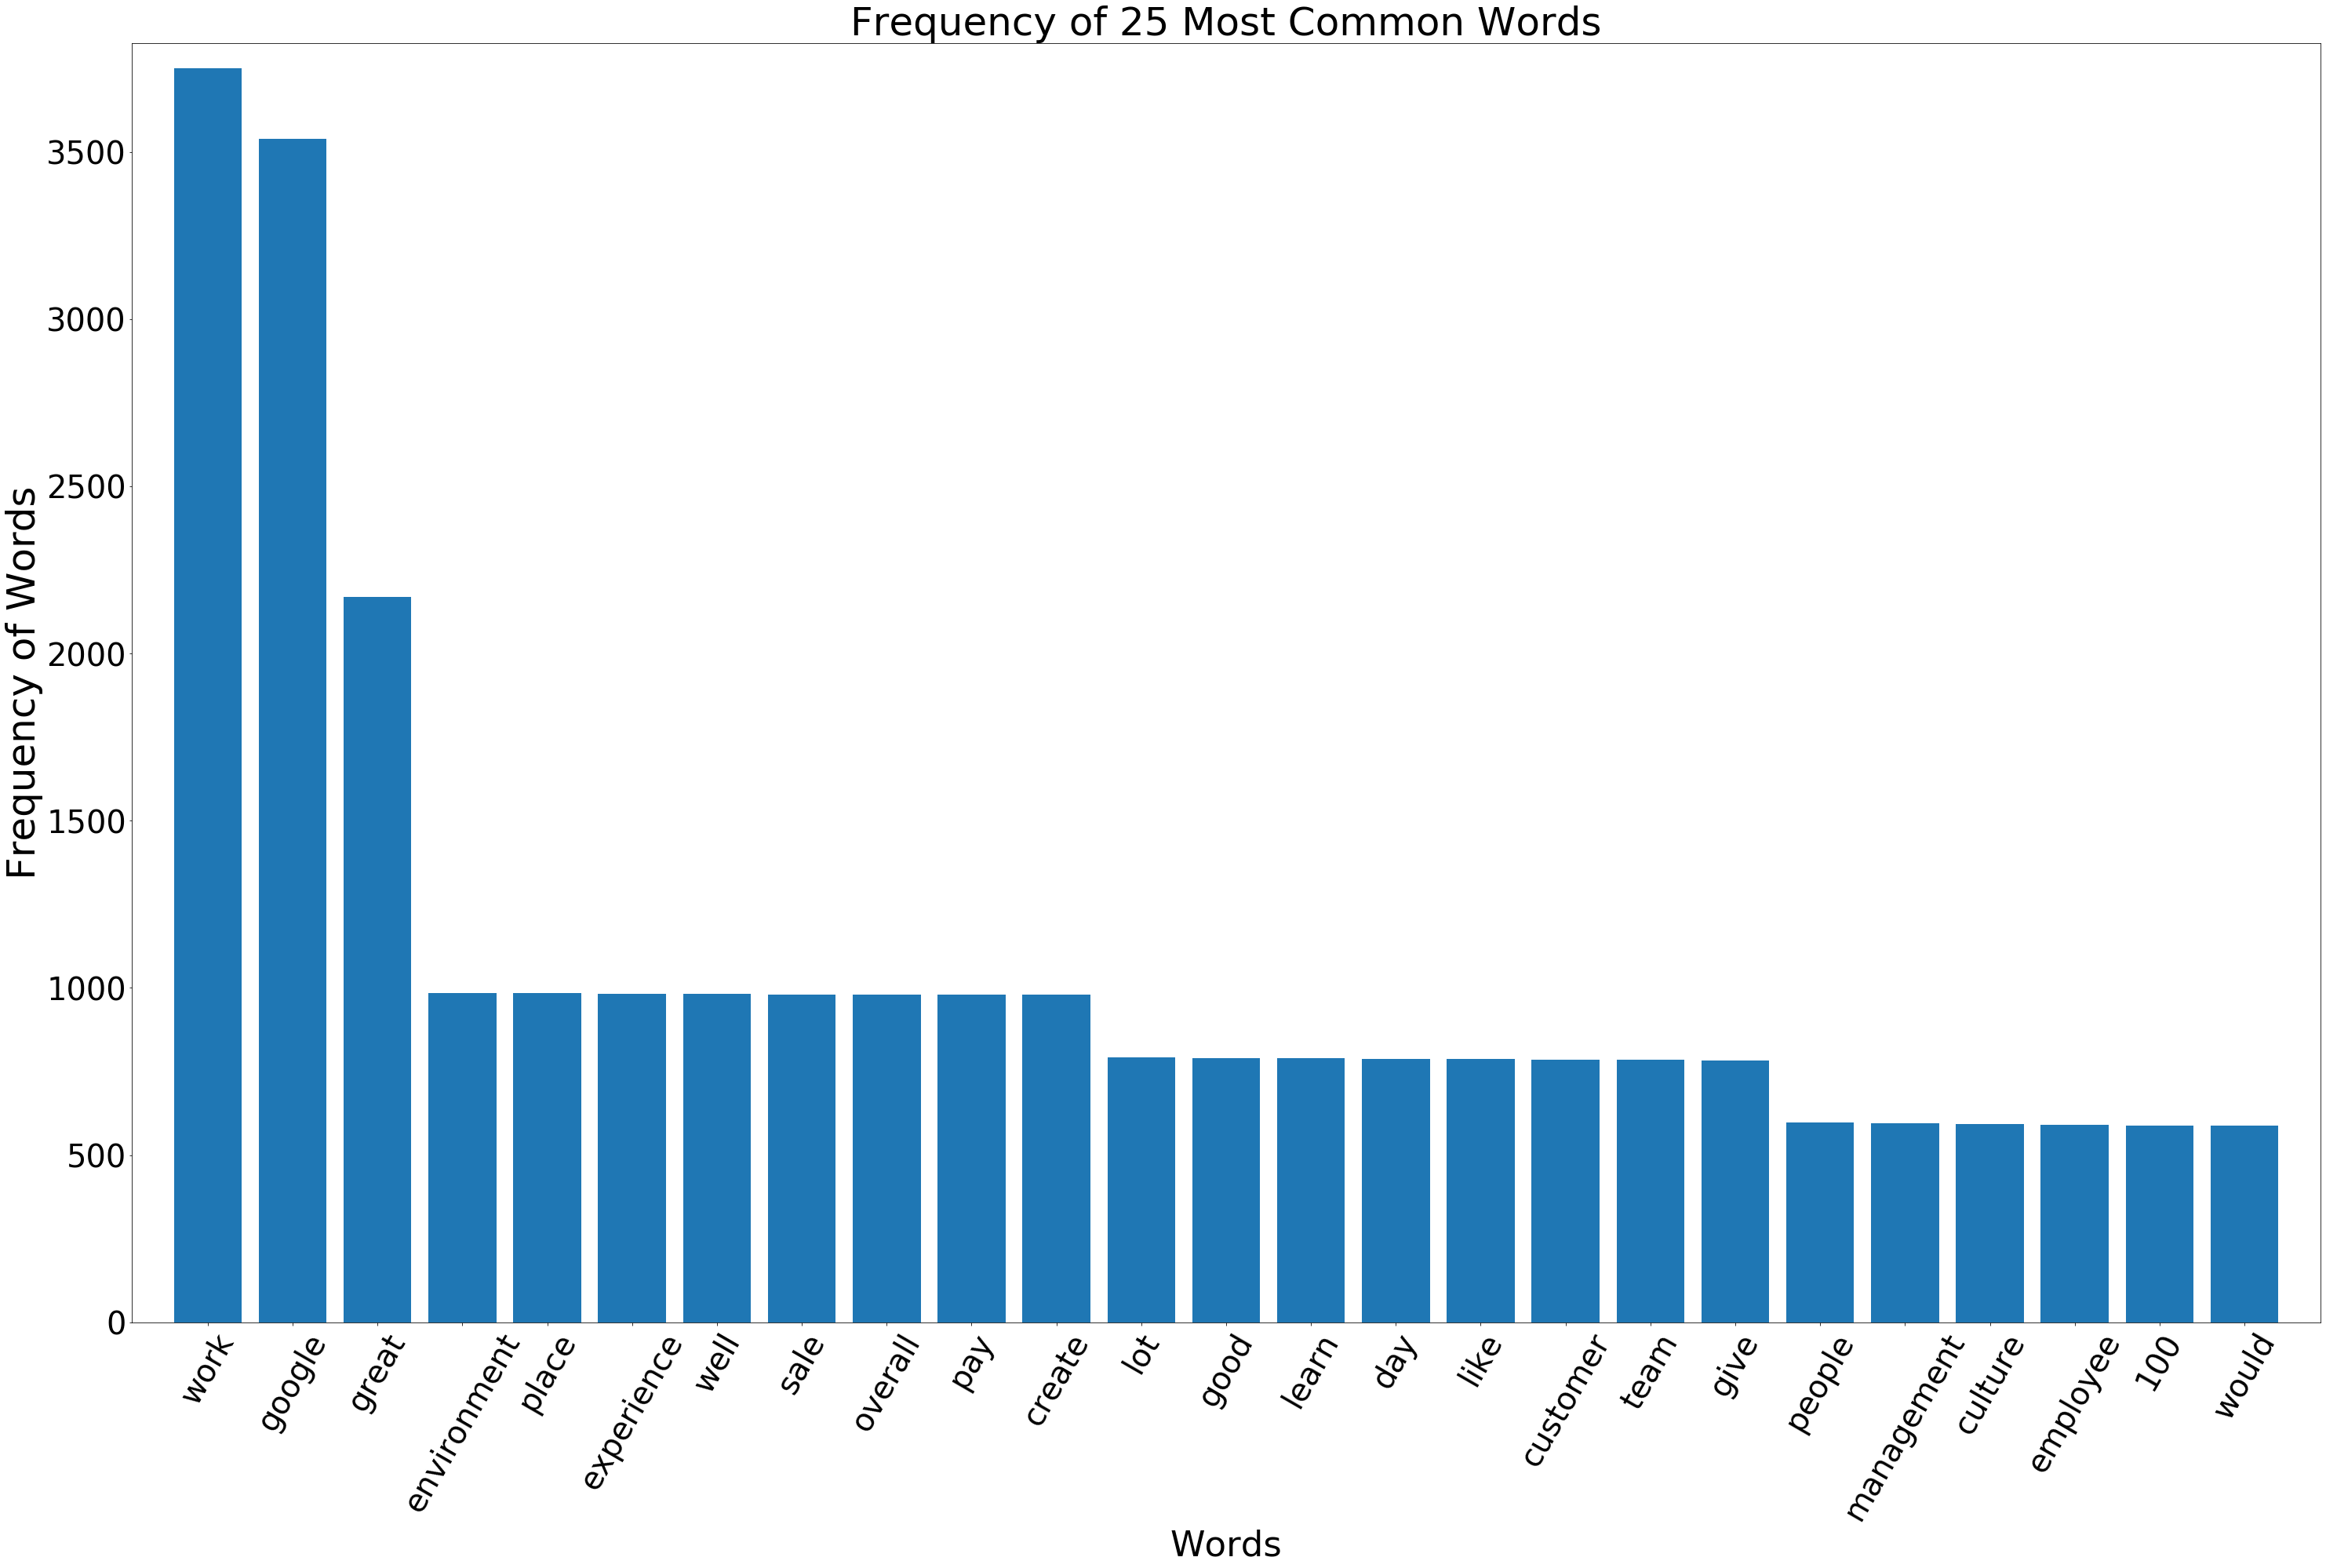

In [32]:
from imblearn.over_sampling import SMOTE
mostcommon_small=FreqDist(allwords).most_common(25)
x,y=zip(*mostcommon_small)

plt.figure(figsize=(50,30))
plt.margins(0.02)
plt.bar(x,y)
plt.title('Frequency of 25 Most Common Words',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

In [33]:
group_by=df.groupby('rating')['lemma_str'].apply(lambda x: Counter(''.join(x).split()).most_common(25))

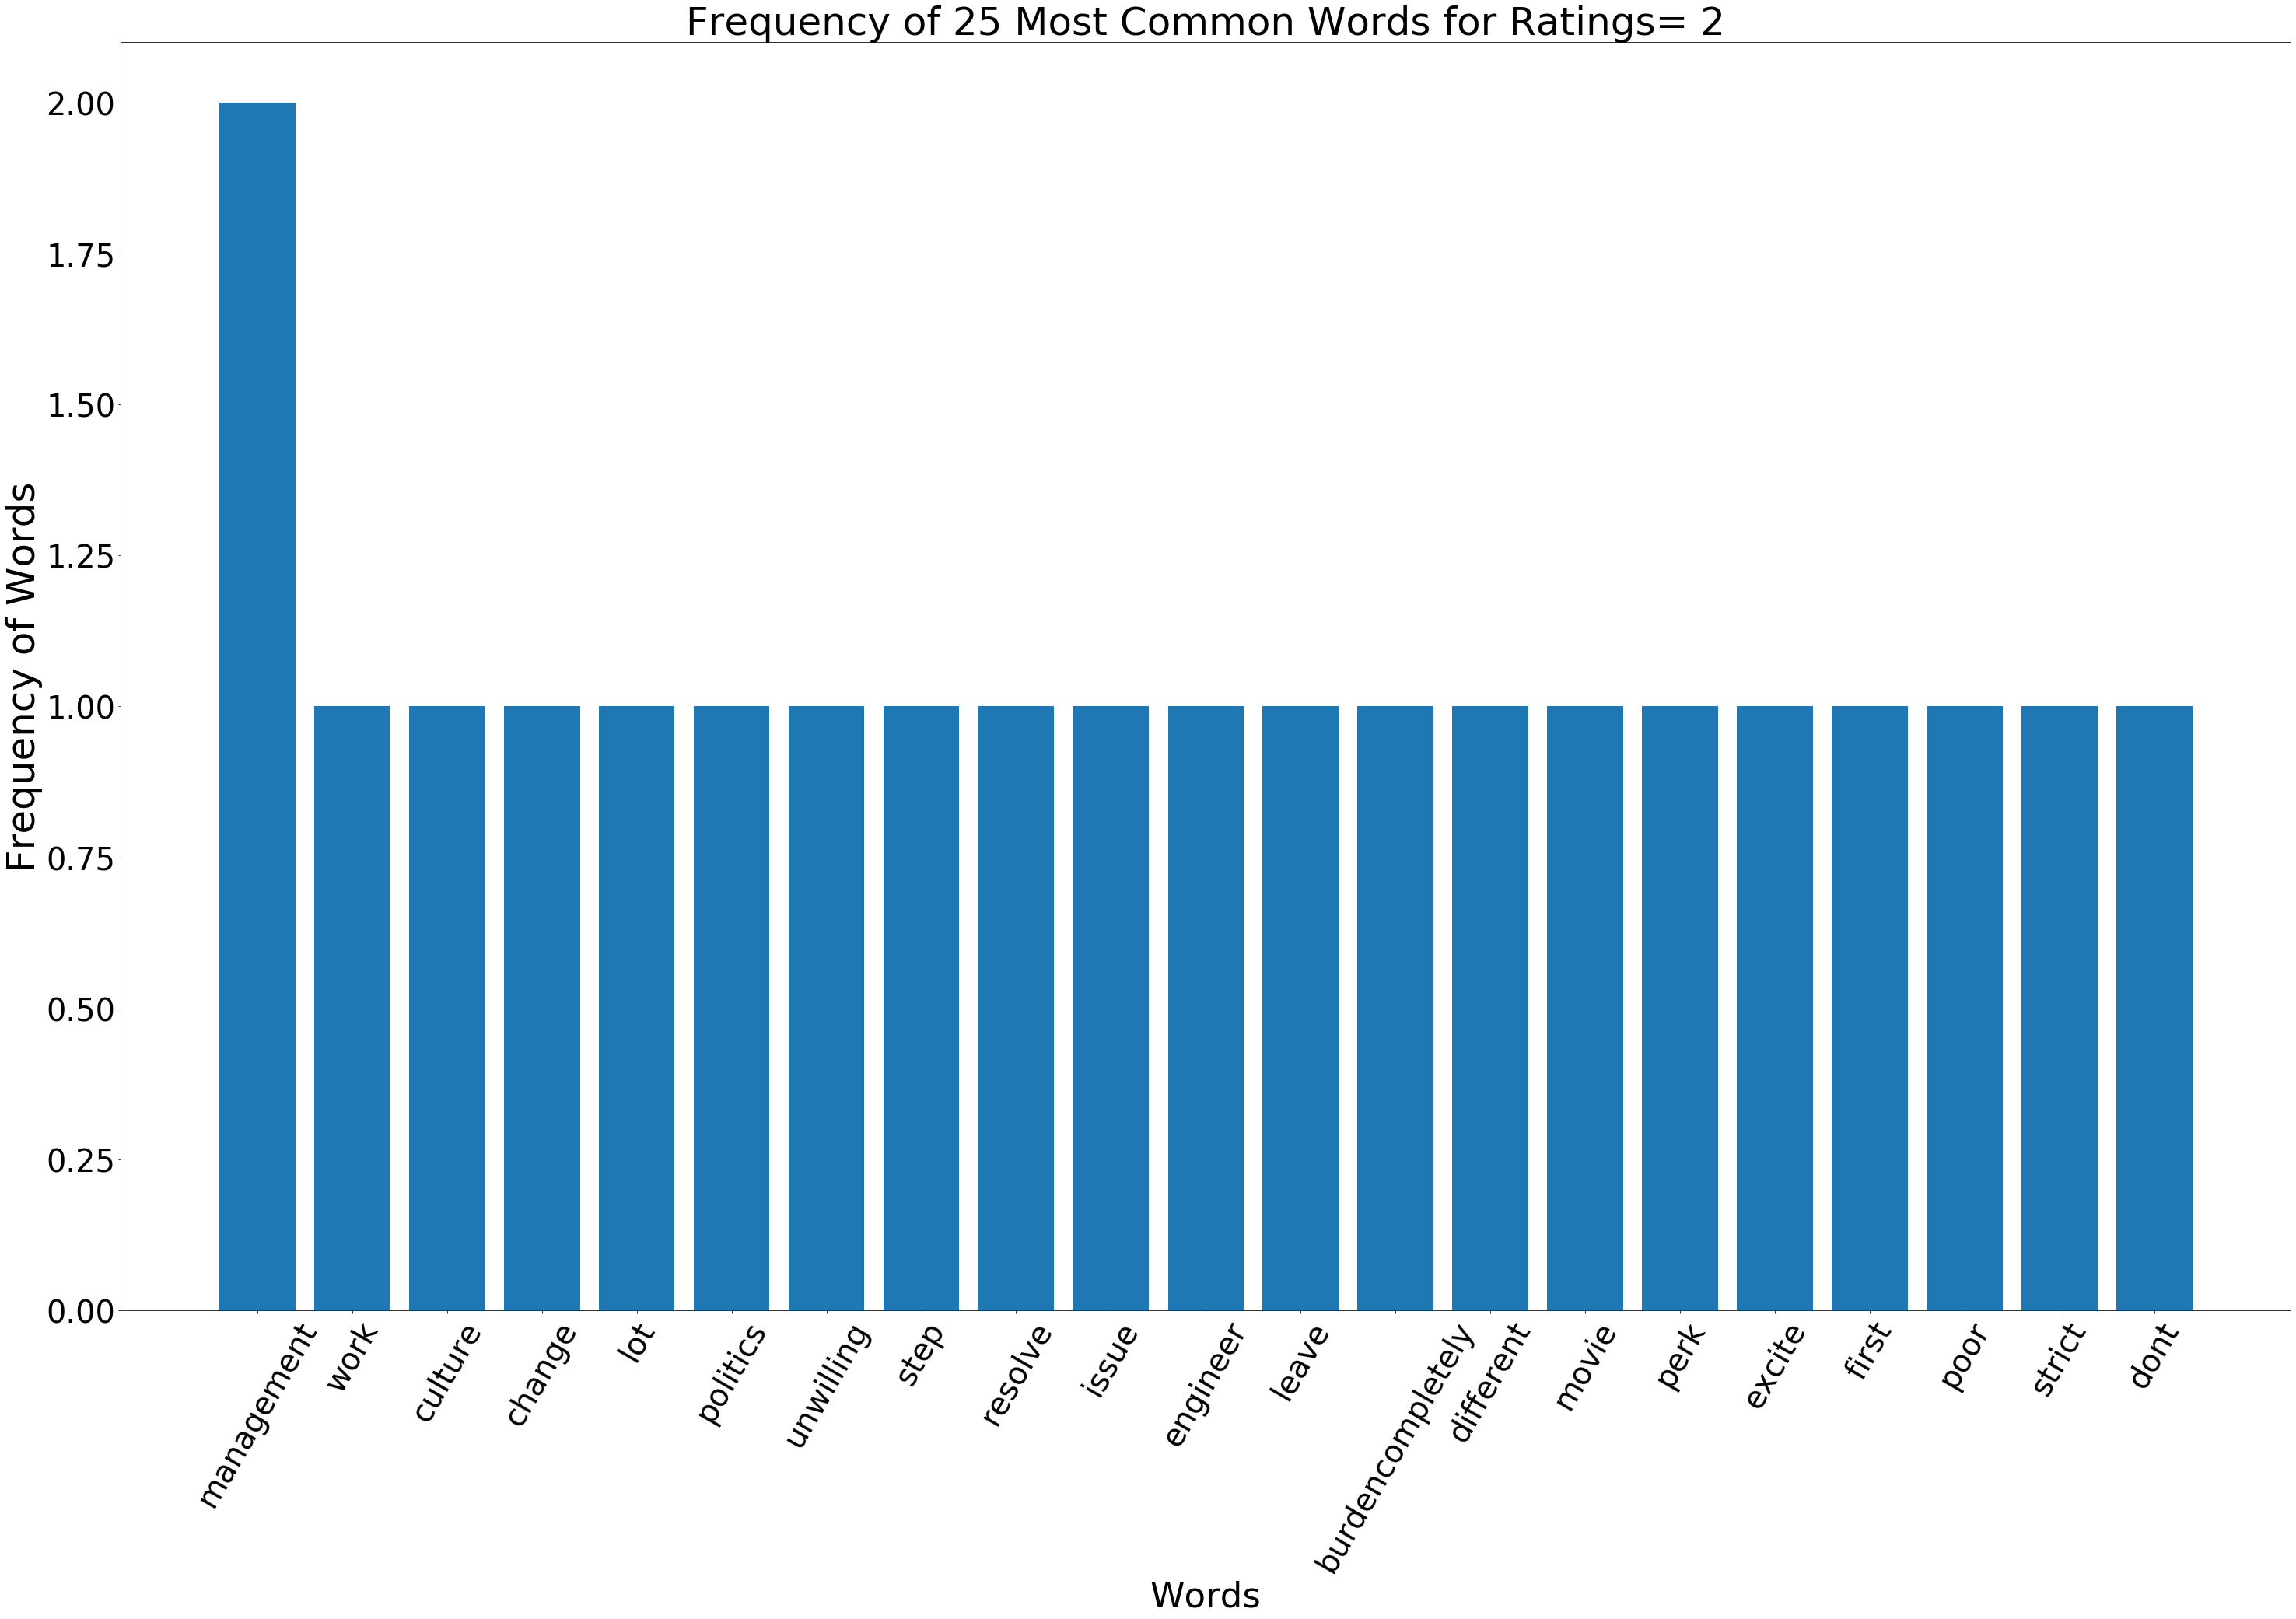

In [34]:
group_by_0 =  group_by.iloc[0]
words0=list(zip(*group_by_0))[0]
freq0=list(zip(*group_by_0))[1]
plt.figure(figsize=(50,30))

plt.bar(words0,freq0)
plt.title('Frequency of 25 Most Common Words for Ratings= 2',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

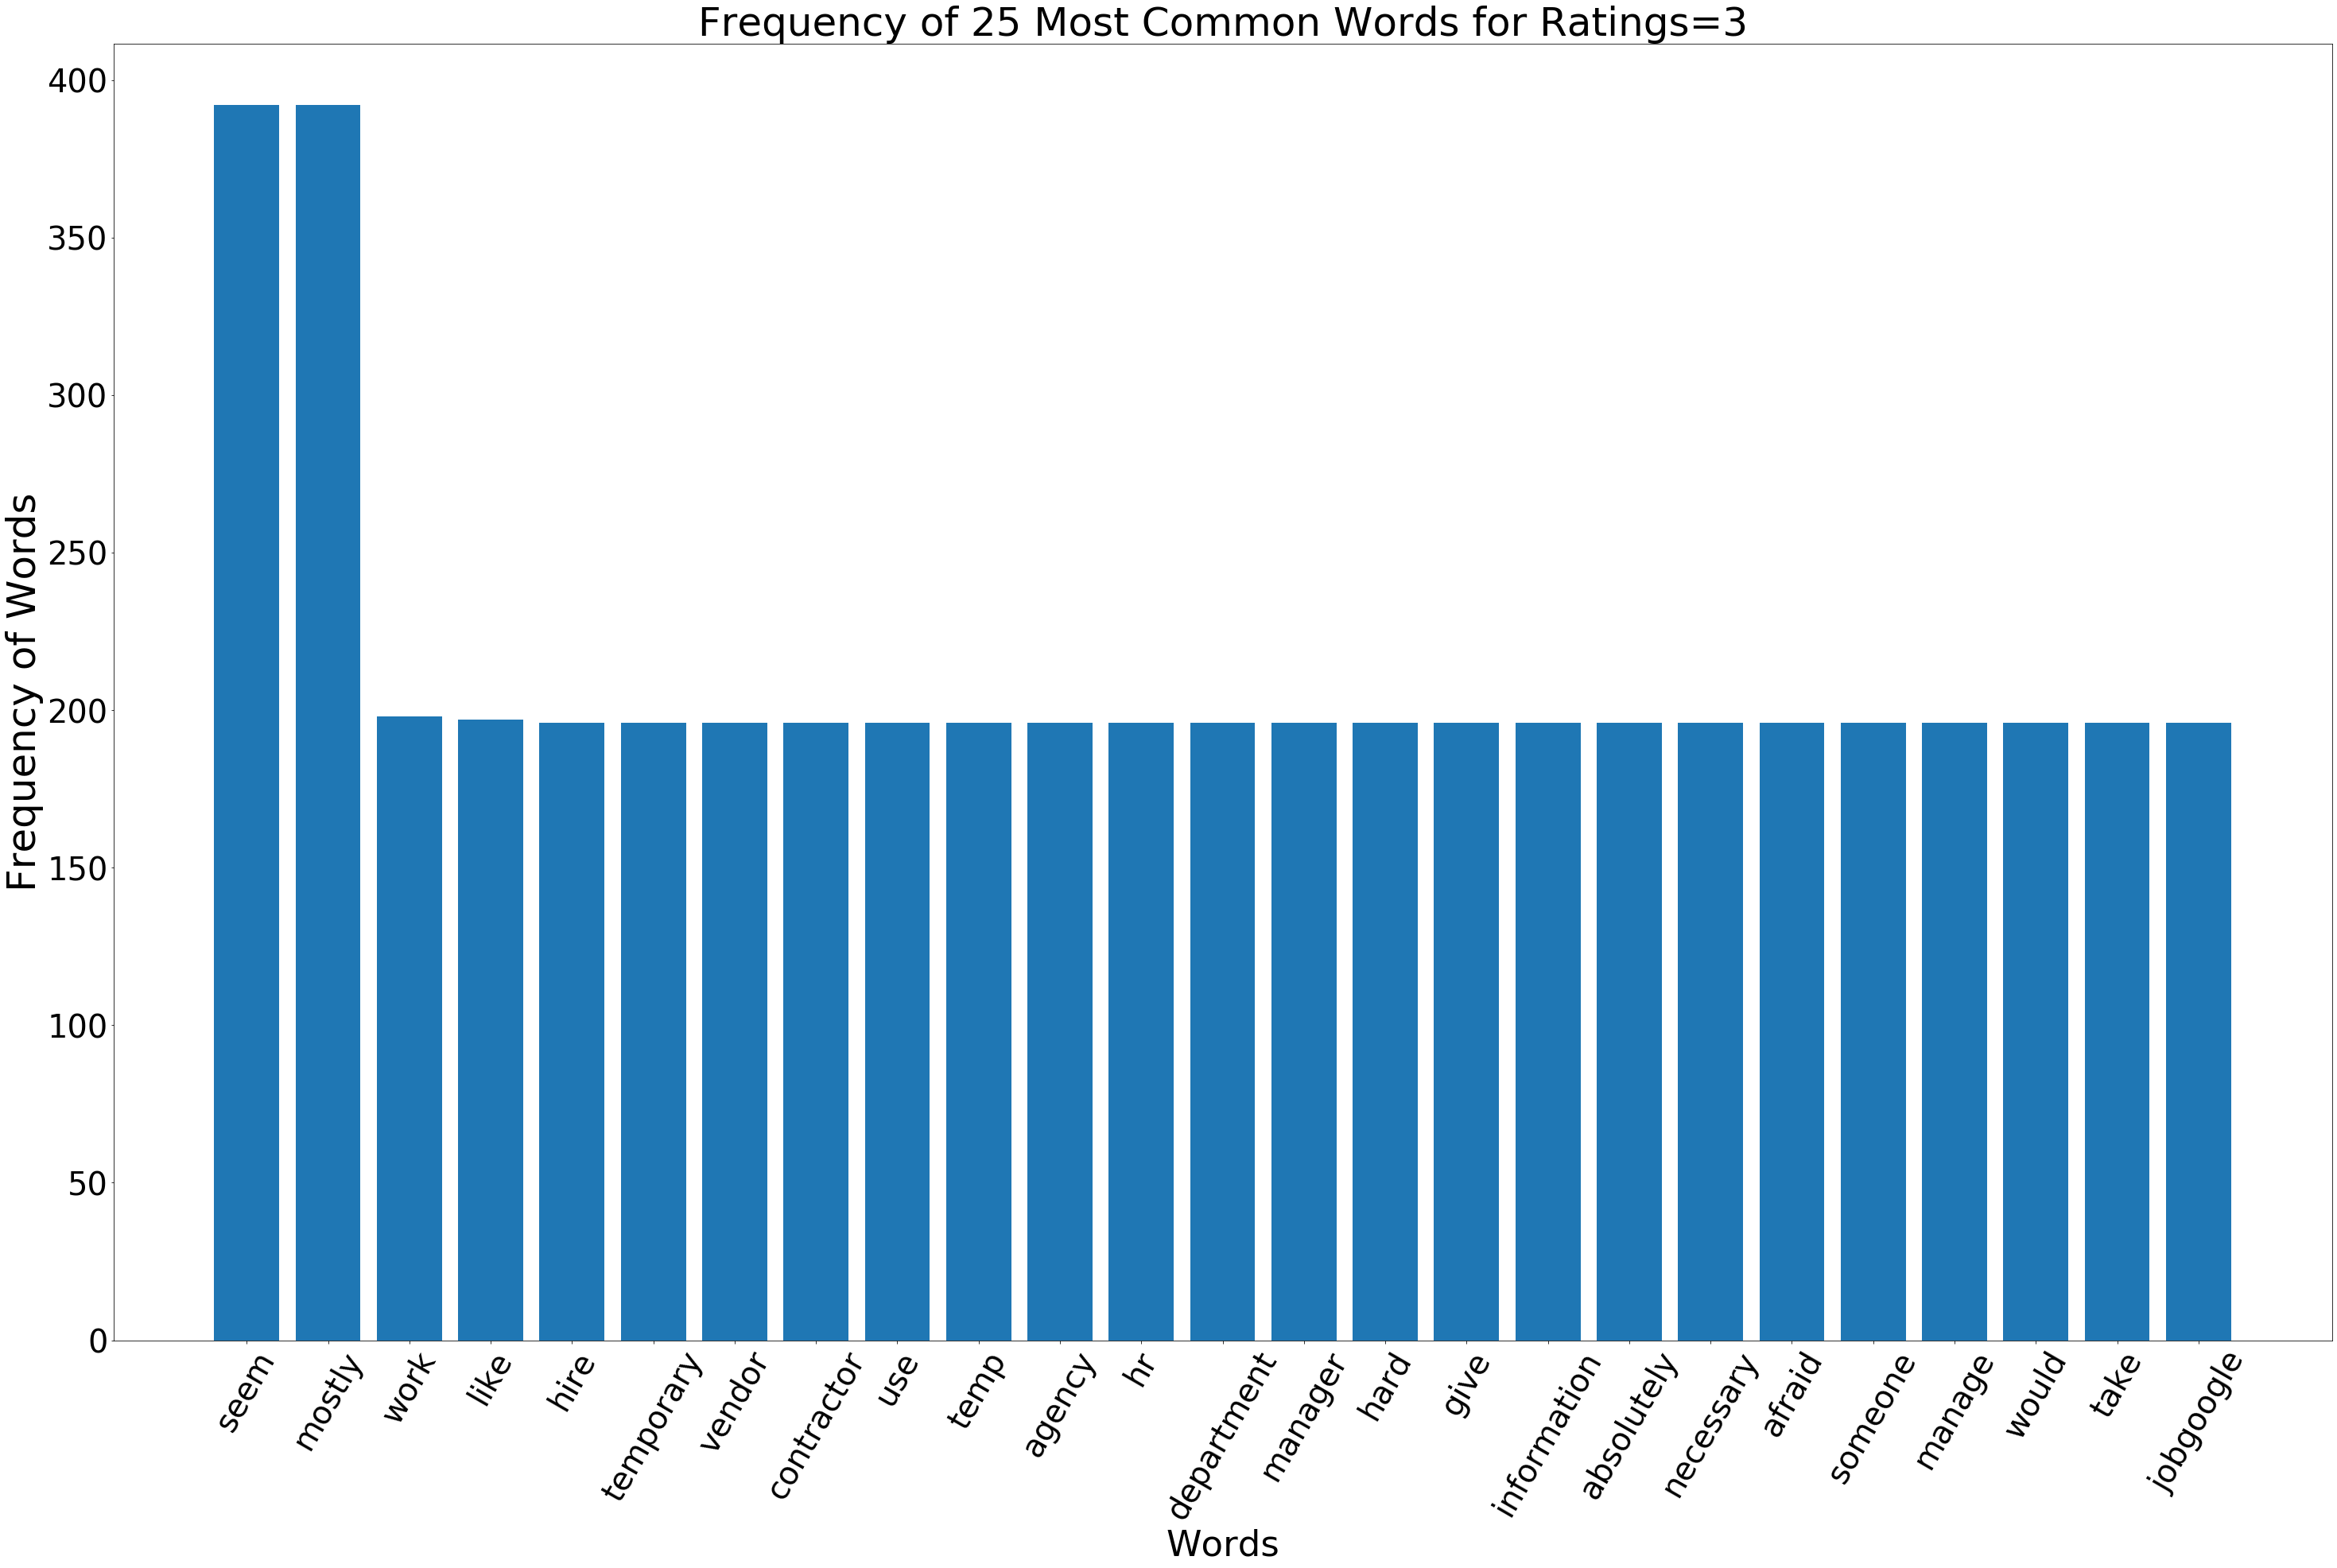

In [35]:
group_by_1 =  group_by.iloc[1]
words1=list(zip(*group_by_1))[0]
freq1=list(zip(*group_by_1))[1]
plt.figure(figsize=(50,30))

plt.bar(words1,freq1)
plt.title('Frequency of 25 Most Common Words for Ratings=3',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

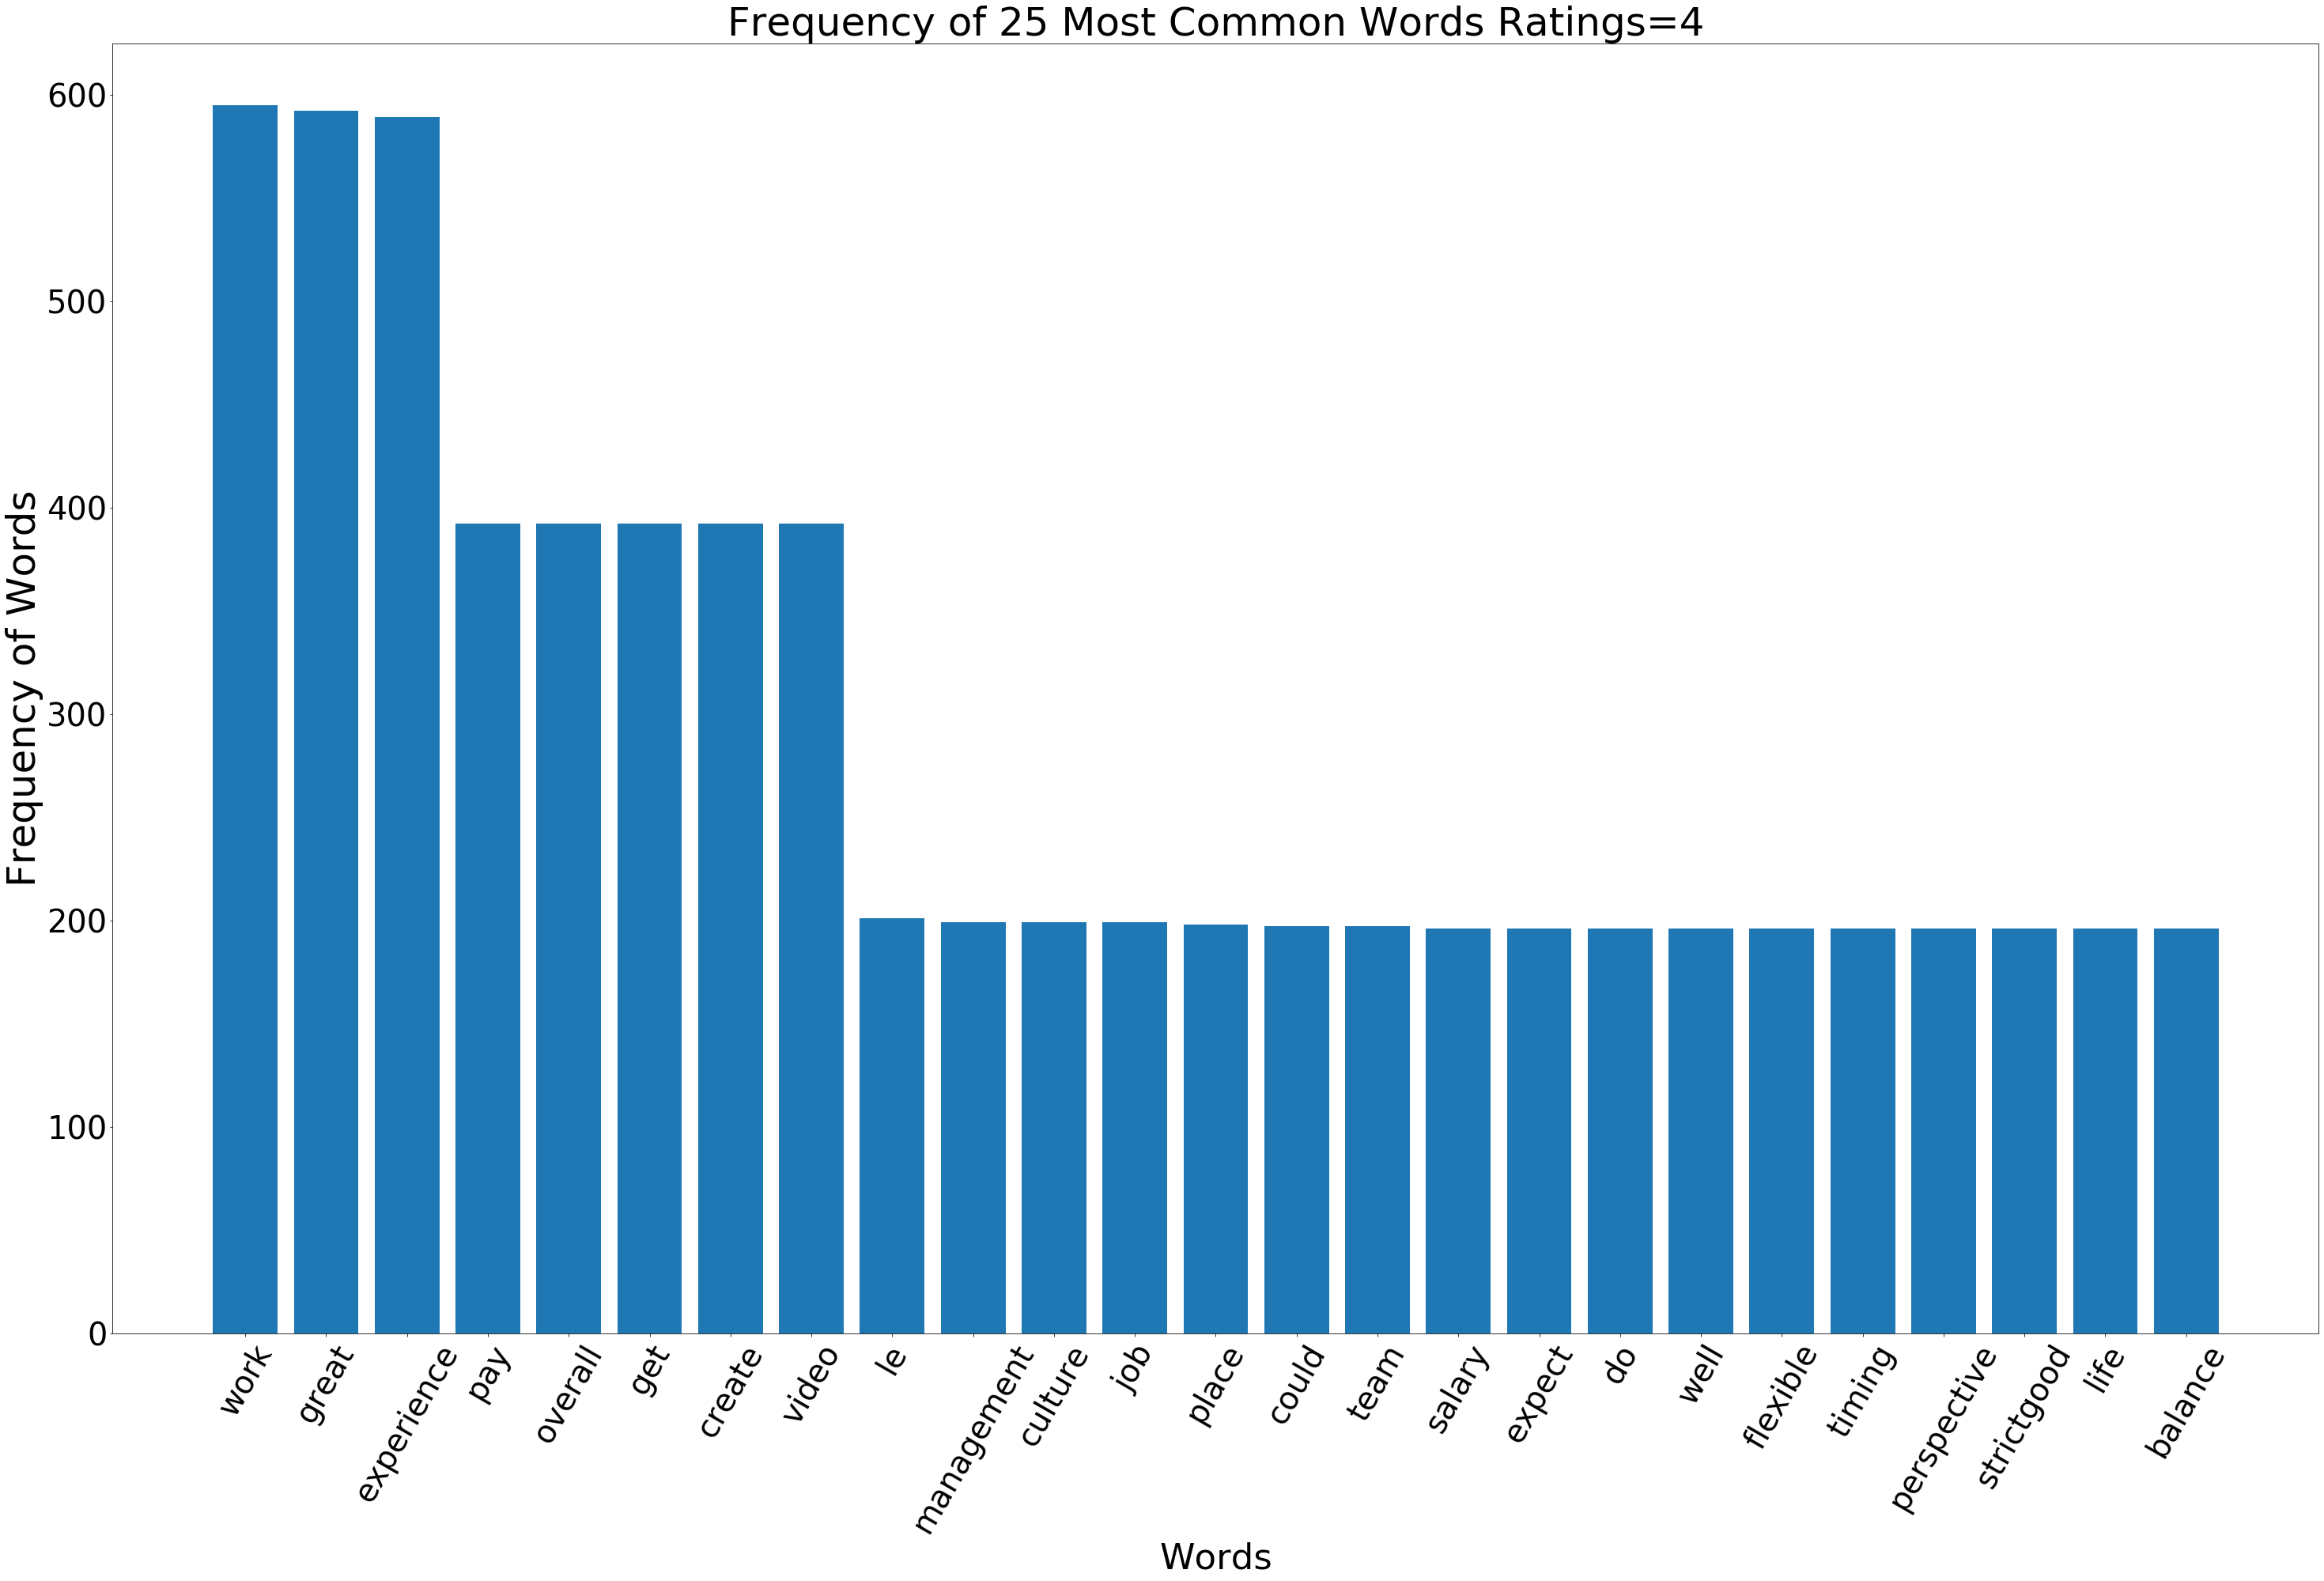

In [36]:
group_by_2 =  group_by.iloc[2]
words2=list(zip(*group_by_2))[0]
freq2=list(zip(*group_by_2))[1]
plt.figure(figsize=(50,30))

plt.bar(words2,freq2)
plt.title('Frequency of 25 Most Common Words Ratings=4',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

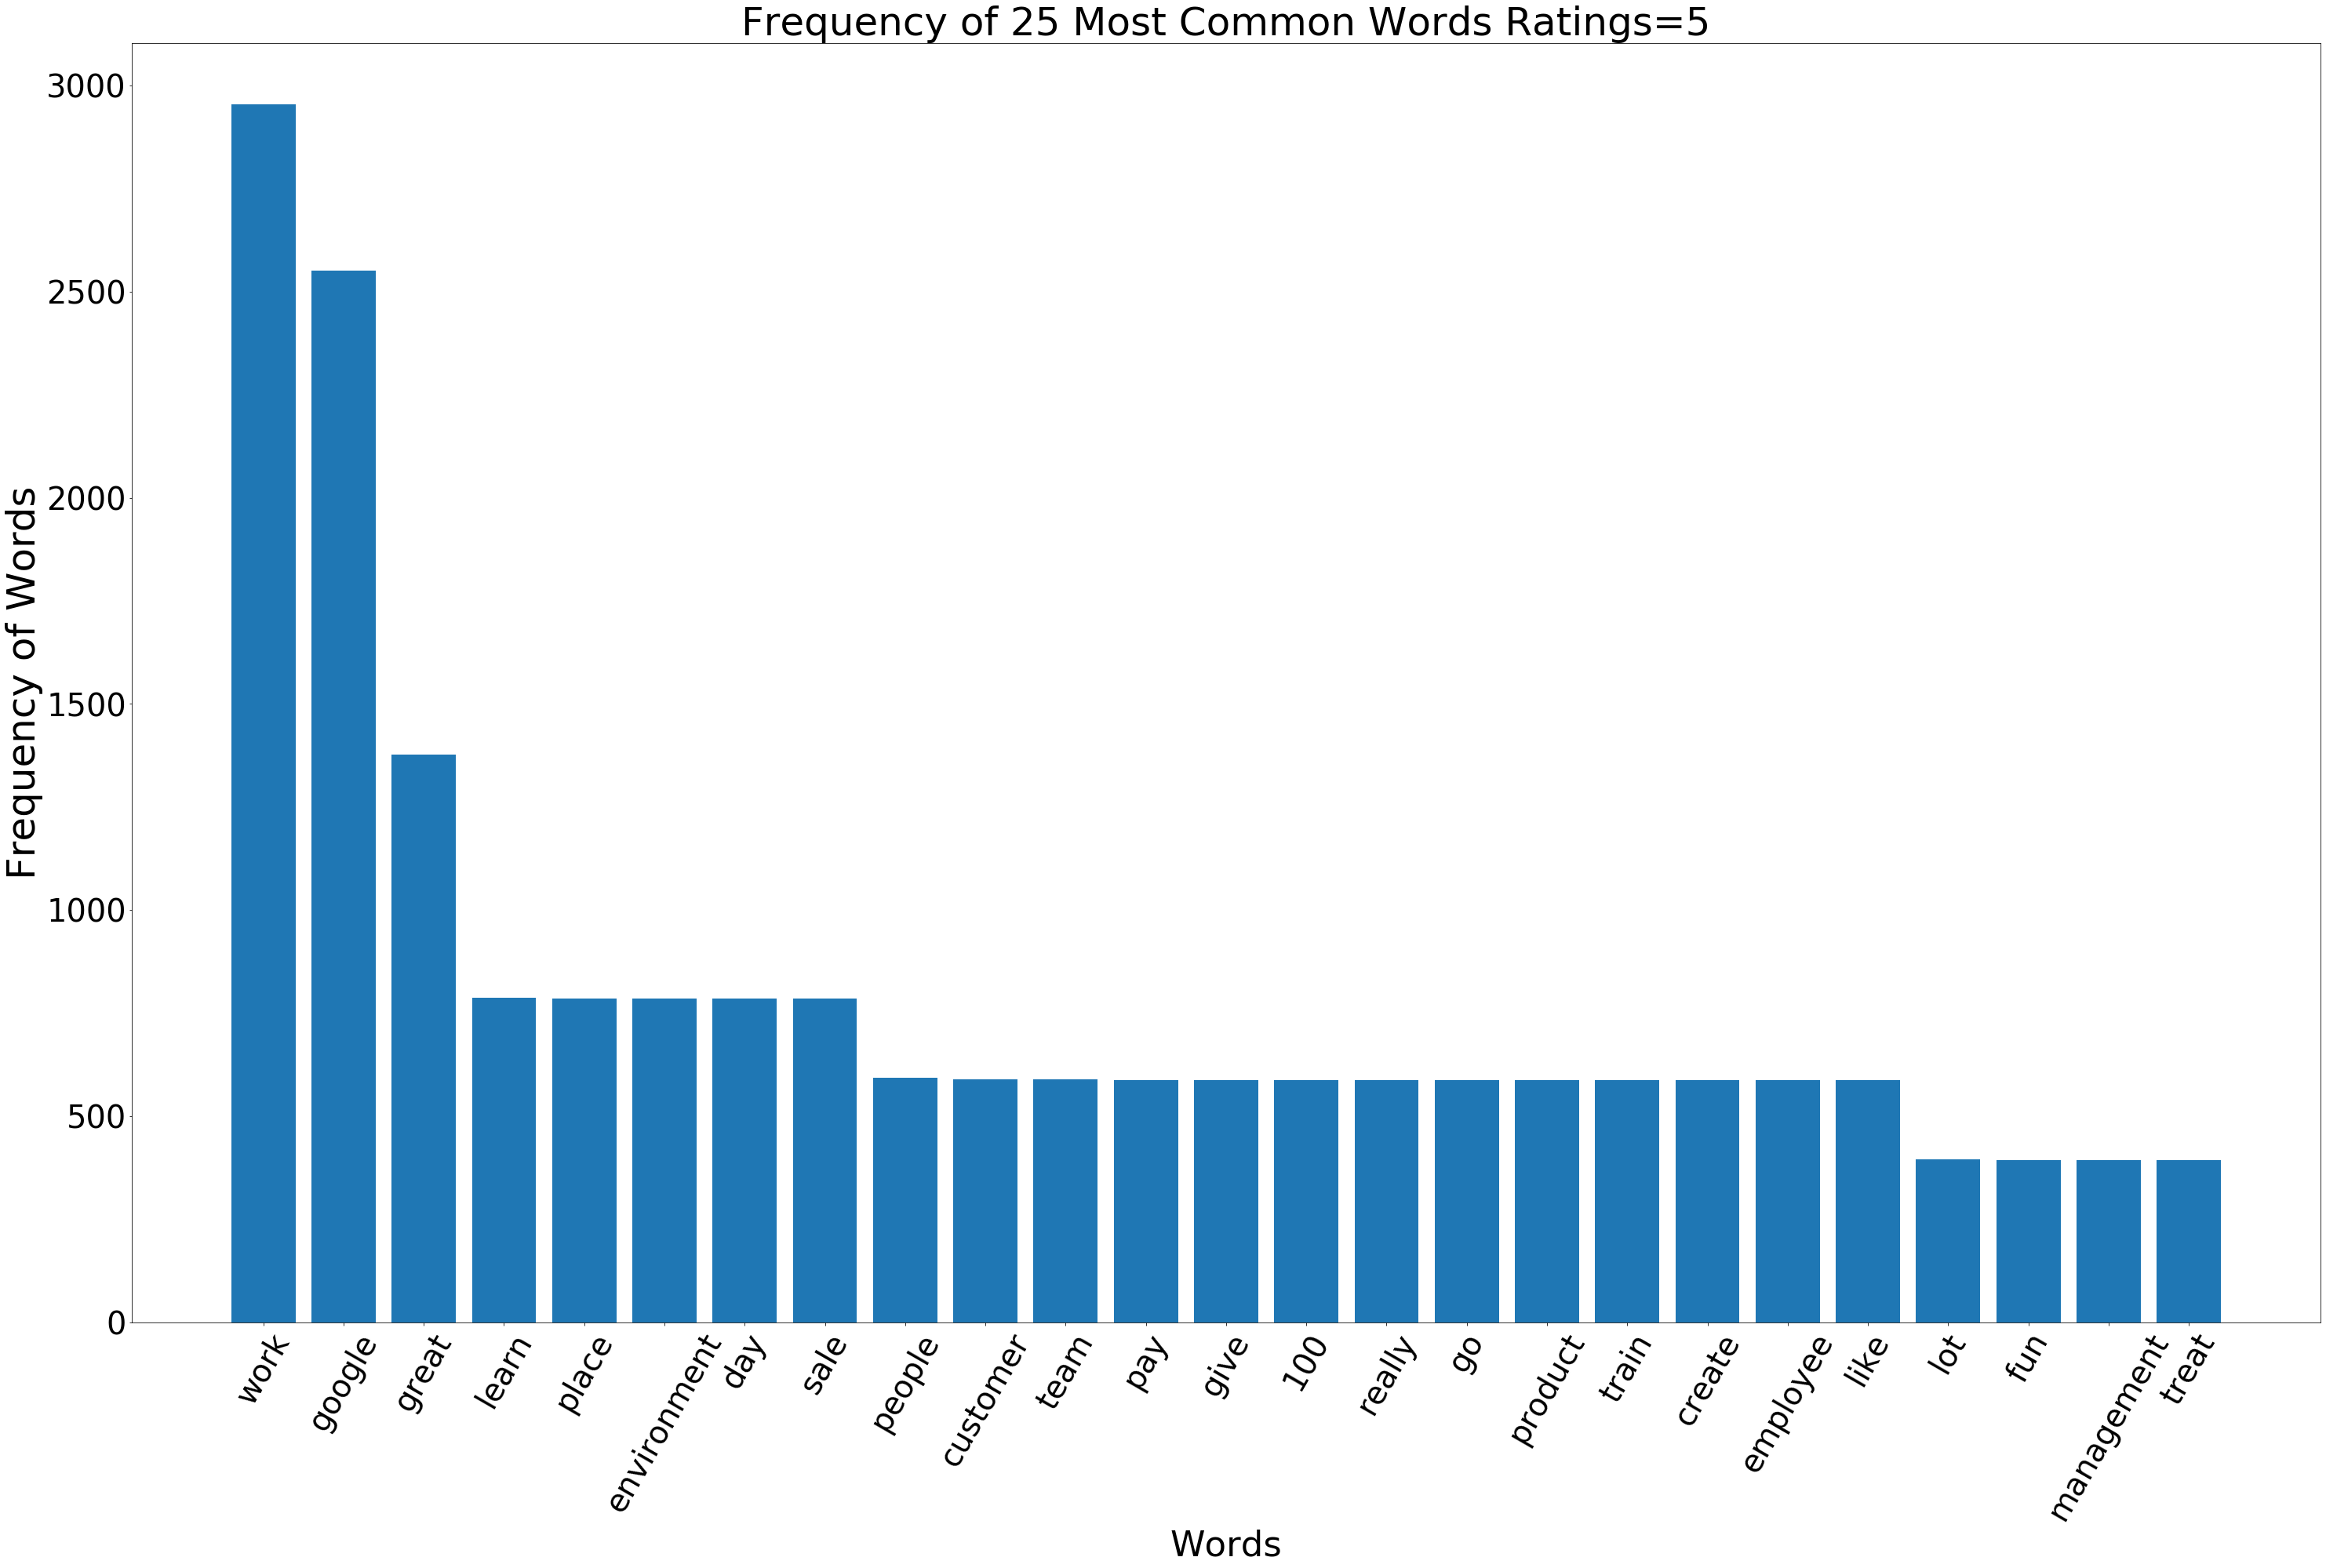

In [37]:
group_by_3 =  group_by.iloc[3]
words3=list(zip(*group_by_3))[0]
freq3=list(zip(*group_by_3))[1]
plt.figure(figsize=(50,30))

plt.bar(words3,freq3)
plt.title('Frequency of 25 Most Common Words Ratings=5',fontsize=50)
plt.xlabel('Words',fontsize=45)
plt.xticks(rotation=60,fontsize=40)
plt.ylabel('Frequency of Words',fontsize=50)
plt.yticks(fontsize=40)
plt.show()

# Topic Modelling

Finally, let’s apply a few topic modeling algorithms to help derive specific topics or themes for our reviews. Before we have determine the topics for each rating we have to perform one additional processing step. Right now our data/words are still readable to us human beings whereas computers only understand numbers. We need to convert our text into numbers or vectors.

# CountVectorizer

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
tf_vectorizer = CountVectorizer(max_df=0.9,min_df=0.10, max_features=4000)

In [39]:
tf = tf_vectorizer.fit_transform(df['lemma_str'].values.astype('U'))

In [40]:
tf_feature_names=tf_vectorizer.get_feature_names()

In [41]:
len(tf_feature_names)

25

In [42]:
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))

In [43]:
doc_term_matrix.head()

,culture,day,employee,environment,experience,give,go,good,google,great,...,overall,pay,people,place,really,sale,team,well,work,would
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
doc_term_matrix['rating']=df['rating']

In [45]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = list(tf_feature_names)
dataframe = doc_term_matrix
array = dataframe.values
X = array[:,0:25]
Y = array[:,25]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False  True False  True  True False False False False
 False False False False False False False False False False  True False
  True]
Feature Ranking: [ 9 14 10 17  1  8  1  1 18  5 11 12 20  3  4 16  7 21 13  6  2 15  1 19
  1]


In [46]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.23598221 0.15935298 0.1348739 ]
[[-0.01769137  0.05093938  0.13263158  0.14130079 -0.15707147  0.1019557
   0.06517128 -0.09138942  0.7855711  -0.33702796 -0.11720699  0.01396266
  -0.06300737  0.05044922  0.03157307 -0.06073674 -0.23880897 -0.03834262
  -0.0570583  -0.06698425  0.06218838 -0.03553495  0.01707678  0.26974376
   0.10770545]
 [ 0.06599116 -0.03329549  0.05766265  0.10330125 -0.11000122 -0.03924997
   0.00253621  0.11689567 -0.30276727 -0.11697293  0.20404838  0.04252373
   0.11445908 -0.18162451 -0.06119017 -0.25191182 -0.09409051  0.08501116
   0.20931102 -0.00397592 -0.16497419 -0.30167652  0.08876338  0.71060317
   0.01318734]
 [ 0.13149089  0.17946351 -0.06395344 -0.14493305 -0.12930313 -0.09490673
   0.04078555  0.02770136 -0.21691485 -0.50113248 -0.03069957  0.13759548
  -0.01553344 -0.08102917  0.17960377 -0.36135471 -0.1033838  -0.11841292
  -0.07641179  0.07189052  0.4413845  -0.24529893  0.15115484 -0.30964583
  -0.01050683]]


In [47]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.02219996 0.01409322 0.02152426 0.03617786 0.15207857 0.03862914
 0.02864518 0.12116855 0.05467678 0.01662552 0.00765487 0.08468119
 0.02331588 0.02680588 0.00575257 0.00404376 0.0599121  0.00075042
 0.06328927 0.00063583 0.04521862 0.00823866 0.04104877 0.06699834
 0.05583479]


# Bag of N grams

A word is just a single token, often known as a unigram or 1-gram. We already know that the Bag of Words
model doesn’t consider order of words. But what if we also wanted to take into account phrases or collection of
words which occur in a sequence? N-grams help us achieve that. An N-gram is basically a collection of word
tokens from a text document such that these tokens are contiguous and occur in a sequence. Bi-grams indicate
n-grams of order 2 (two words), Tri-grams indicate n-grams of order 3 (three words), and so on. The Bag of NGrams
model is hence just an extension of the Bag of Words model so we can also leverage N-gram based
features. The following example depicts bi-gram based features in each document feature vector.

In [48]:
# you can set the n-gram range to 1,2 to get unigrams as well as bigrams
bv = CountVectorizer(ngram_range=(2,2))
bv_matrix = bv.fit_transform(df['lemma_str'])
bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
pd.DataFrame(bv_matrix, columns=vocab)

,100 dental,100 drug,100 everything,100 independent,12 day,14 year,2000s grown,2nd class,able enhance,able make,...,world google,world wide,would go,would keep,would rate,would take,write communication,year experience,yearits good,young motivate
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4139,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4140,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Feature Selection Techniques-Filter Method LDA

## Latent Dirichlet Allocation(LDA) Topic Modeling

In [49]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online',max_iter=50,random_state=0).fit(tf)

In [50]:
no_top_words=10

def display_topics(model,feature_names,no_top_words):
    for topic_idx,topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                       for i in topic.argsort()[:-no_top_words - 1:-1]]))
display_topics(lda_model, tf_feature_names, no_top_words)

Topic 0:
sale google management culture team day environment manage really would
Topic 1:
experience google work pay great place good day like go
Topic 2:
work great learn environment place good people like would management
Topic 3:
google work employee give environment good experience day well pay
Topic 4:
google give would work manage overall go day experience place
Topic 5:
work people great environment google lot culture place really employee
Topic 6:
great pay experience overall team good lot learn place people
Topic 7:
experience google work pay great place good day like go
Topic 8:
google work well day go like experience management employee sale
Topic 9:
like work good lot place learn day would google go


In [51]:
tt_matrix = lda_model.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('afraid someone', 784.0406787960469), ('able enhance', 589.3377697085059), ('across canada', 396.10172634148824), ('100 dental', 197.90444758749175), ('agency hr', 196.75991786227559), ('100 drug', 196.42688689381214), ('100 independent', 195.93644167179067), ('access information', 195.86476605184075), ('adwords live', 195.8596543574173)]

[]

[('also pay', 594.3867622143193), ('able make', 198.57649219736857), ('able speak', 198.0264027070746), ('100 independent', 197.21410124155872), ('adecco google', 195.83460144937044)]

[('able enhance', 590.0411718719696), ('also pay', 197.69407581246136), ('100 everything', 196.79731342582232), ('14 year', 195.90091443310695), ('100 independent', 195.89963056023228)]

[('able enhance', 481.4565756573154), ('14 year', 391.5662673340714), ('also share', 391.56470045078504), ('also pay', 368.1180831985138), ('access information', 195.81727765889295)]

[('also pay', 796.2161162013123), ('ad revenue', 402.5535788601325), ('able make', 400.264170595

# pyLDAvis

In [52]:
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.manifold import TSNE
pyLDAvis.enable_notebook()
panel1=pyLDAvis.sklearn.prepare(lda_model,tf,tf_vectorizer)

In [53]:
lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=50,
                          mean_change_tol=0.001, n_components=10, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [54]:
panel1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.203024 -0.163292       1        1  22.898239
8     -0.108346 -0.035622       2        1  18.290965
9      0.147281  0.040695       3        1  13.494171
5      0.056341  0.087076       4        1  12.660899
0     -0.262562 -0.192843       5        1  11.094989
4     -0.159333  0.165460       6        1   7.275336
2      0.229227  0.203873       7        1   5.862660
3     -0.191695  0.204819       8        1   5.830540
1      0.043032 -0.155083       9        1   1.296101
7      0.043032 -0.155083      10        1   1.296101, topic_info=           Term         Freq        Total Category  logprob  loglift
8        google  3562.000000  3562.000000  Default  25.0000  25.0000
23         work  3775.000000  3775.000000  Default  24.0000  24.0000
9         great  2081.000000  2081.000000  Default  23.0000  23.0000
20         sale   993.000000   993.000000  Default  22.0000  22.0000
16          pay   922.000000   922.000000  Default  21.0000  21.0000
..          ...          ...          ...      ...      ...      ...
18        place    13.780178   999.828523  Topic10  -3.2189   0.0615
3   environment    13.780094  1059.636374  Topic10  -3.2189   0.0034
9         great    13.780187  2081.371311  Topic10  -3.2189  -0.6717
8        google    13.780233  3562.391173  Topic10  -3.2189  -1.2091
23         work    13.780229  3775.364600  Topic10  -3.2189  -1.2672

[275 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.300105  culture
0         4  0.328137  culture
0         5  0.326488  culture
0         9  0.023085  culture
0        10  0.023085  culture
...     ...       ...      ...
23       10  0.003708     work
24        3  0.299499    would
24        6  0.656046    would
24        9  0.022185    would
24       10  0.022185    would

[123 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 10, 6, 1, 5, 3, 4, 2, 8])

In [55]:
panel1=pyLDAvis.sklearn.prepare(lda_model,tf,tf_vectorizer,mds='pcoa')

In [56]:
panel1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.203024 -0.163292       1        1  22.898239
8     -0.108346 -0.035622       2        1  18.290965
9      0.147281  0.040695       3        1  13.494171
5      0.056341  0.087076       4        1  12.660899
0     -0.262562 -0.192843       5        1  11.094989
4     -0.159333  0.165460       6        1   7.275336
2      0.229227  0.203873       7        1   5.862660
3     -0.191695  0.204819       8        1   5.830540
1      0.043032 -0.155083       9        1   1.296101
7      0.043032 -0.155083      10        1   1.296101, topic_info=           Term         Freq        Total Category  logprob  loglift
8        google  3562.000000  3562.000000  Default  25.0000  25.0000
23         work  3775.000000  3775.000000  Default  24.0000  24.0000
9         great  2081.000000  2081.000000  Default  23.0000  23.0000
20         sale   993.000000   993.000000  Default  22.0000  22.0000
16          pay   922.000000   922.000000  Default  21.0000  21.0000
..          ...          ...          ...      ...      ...      ...
18        place    13.780178   999.828523  Topic10  -3.2189   0.0615
3   environment    13.780094  1059.636374  Topic10  -3.2189   0.0034
9         great    13.780187  2081.371311  Topic10  -3.2189  -0.6717
8        google    13.780233  3562.391173  Topic10  -3.2189  -1.2091
23         work    13.780229  3775.364600  Topic10  -3.2189  -1.2672

[275 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
0         2  0.300105  culture
0         4  0.328137  culture
0         5  0.326488  culture
0         9  0.023085  culture
0        10  0.023085  culture
...     ...       ...      ...
23       10  0.003708     work
24        3  0.299499    would
24        6  0.656046    would
24        9  0.022185    would
24       10  0.022185    would

[123 rows x 3 columns], R=25, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 10, 6, 1, 5, 3, 4, 2, 8])

# TF-IDF

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=20, max_features=25,use_idf=True)

In [58]:
tfidf = tfidf_vectorizer.fit_transform(df['lemma_str'])
tfidf_feature_names=tfidf_vectorizer.get_feature_names()

In [59]:
doc_term_matrix_tfidf = pd.DataFrame(tfidf.toarray(), columns=list(tfidf_feature_names))

In [60]:
doc_term_matrix_tfidf['rating']=df['rating']

In [61]:
doc_term_matrix_tfidf

,100,create,culture,customer,day,employee,environment,experience,give,good,...,overall,pay,people,place,sale,team,well,work,would,rating
0,0.0,0.0,0.000000,0.862694,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,5.0
1,0.0,0.0,0.000000,0.862694,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0000,5.0
2,0.0,0.0,0.539264,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.538034,0.000000,0.0,0.0,0.000000,0.000000,0.0000,4.0
3,0.0,0.0,0.568654,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.301297,0.0000,2.0
4,0.0,0.0,0.000000,0.000000,0.623761,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.365613,0.0000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,0.0,0.0,0.000000,0.000000,0.000000,0.435491,0.360013,0.0,0.0,0.000000,...,0.0,0.0,0.433751,0.360163,0.0,0.0,0.000000,0.460690,0.0000,5.0
4138,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.399678,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.234492,0.0000,5.0
4139,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.471091,0.000000,0.0000,3.0
4140,0.0,0.0,0.000000,0.000000,0.406024,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.372114,0.0,0.0,0.000000,0.237988,0.4502,5.0


In [62]:
# Feature Extraction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv"
names = list(tfidf_feature_names)
dataframe = doc_term_matrix_tfidf
array = dataframe.values
X = array[:,0:25]
Y = array[:,25]
# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 5)
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 5
Selected Features: [False False False False  True False False  True False False False False
 False False False False False  True False False False False  True False
  True]
Feature Ranking: [18  8  6 16  1  7 11  1  3  2  5 19 13  4 14 17  9  1 21 20 12 15  1 10
  1]


# PCA

In [63]:
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=3)
fit = pca.fit(X)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.components_)

Explained Variance: [0.15765756 0.10890273 0.10524434]
[[ 0.09003827  0.1297746  -0.01011368  0.43761102 -0.06075444 -0.19978133
  -0.1349579   0.18484061 -0.21307477  0.0556491  -0.55458811  0.26632559
   0.0291474  -0.14926464 -0.04581013  0.01865268  0.12540304  0.17491015
  -0.04652348 -0.03358162 -0.04513751  0.13466845 -0.07742086 -0.32833507
  -0.22651512]
 [ 0.08631906 -0.19588236  0.12997946 -0.18058527 -0.11569452  0.02318
   0.20735623 -0.03195157 -0.14078606  0.16488537 -0.3817384   0.14474617
   0.40935831 -0.06733664  0.21802156 -0.01516915 -0.17119968 -0.02374742
   0.21212324  0.29761775 -0.1599712  -0.14756938  0.00334391  0.43184875
  -0.12593639]
 [ 0.00129895 -0.14628827  0.05008007 -0.11336347  0.25500325 -0.18868466
  -0.26982323 -0.04592413 -0.15928109  0.22102963 -0.23131379 -0.33911838
   0.07814746  0.48576252  0.07151012  0.09417621 -0.20705785  0.11638478
  -0.17105896 -0.03401599  0.12325747 -0.1659166   0.36134507 -0.16903035
  -0.01451665]]


# Feature Importance

In [64]:
# Feature Importance with Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)
print(model.feature_importances_)

[0.00072911 0.09291525 0.03970196 0.03740143 0.04087934 0.02270025
 0.03519615 0.14351289 0.02407588 0.05635922 0.09600159 0.03273117
 0.00095876 0.0850128  0.01886976 0.01113753 0.02406678 0.08140467
 0.00141531 0.00266832 0.00408608 0.01875619 0.01729081 0.03604391
 0.07608483]


You can see that we are given an importance score for each attribute where the larger score the more important the attribute. The scores suggest at the importance of experience,give,google

# Document Simmilarity

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(tfidf.toarray())
similarity_df = pd.DataFrame(similarity_matrix)
similarity_df

,0,1,2,3,4,5,6,7,8,9,...,4132,4133,4134,4135,4136,4137,4138,4139,4140,4141
0,1.000000,1.000000,0.182042,0.000000,0.000000,0.232131,0.140835,0.310888,0.000000,0.0,...,0.000000,0.000000,0.222877,0.000000,0.838391,0.146758,0.000000,0.000000,0.000000,0.145065
1,1.000000,1.000000,0.182042,0.000000,0.000000,0.232131,0.140835,0.310888,0.000000,0.0,...,0.000000,0.000000,0.222877,0.000000,0.838391,0.146758,0.000000,0.000000,0.000000,0.145065
2,0.182042,0.182042,1.000000,0.612609,0.000000,0.349791,0.548153,0.468466,0.000000,0.0,...,0.000000,0.000000,0.158637,0.000000,0.000000,0.337831,0.000000,0.000000,0.000000,0.565670
3,0.000000,0.000000,0.612609,1.000000,0.110158,0.109776,0.066601,0.147020,0.000000,0.0,...,0.139693,0.000000,0.000000,0.065430,0.000000,0.138804,0.070652,0.000000,0.279621,0.580485
4,0.000000,0.000000,0.000000,0.110158,1.000000,0.133209,0.080819,0.178403,0.000000,0.0,...,0.169513,0.369905,0.000000,0.079397,0.000000,0.168434,0.697918,0.393122,0.650929,0.166491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,0.146758,0.146758,0.337831,0.138804,0.168434,0.654851,0.731875,0.602464,0.199764,0.0,...,0.538178,0.000000,0.226389,0.588927,0.000000,1.000000,0.108028,0.173716,0.312298,0.672777
4138,0.000000,0.000000,0.000000,0.070652,0.697918,0.209536,0.051834,0.280627,0.367219,0.0,...,0.108720,0.000000,0.000000,0.050923,0.000000,0.108028,1.000000,0.504271,0.454295,0.106782
4139,0.000000,0.000000,0.000000,0.000000,0.393122,0.000000,0.166706,0.000000,0.135510,0.0,...,0.520484,0.256143,0.000000,0.491321,0.000000,0.173716,0.504271,1.000000,0.435374,0.171712
4140,0.000000,0.000000,0.000000,0.279621,0.650929,0.086709,0.118475,0.116128,0.053542,0.0,...,0.248495,0.240782,0.101767,0.245810,0.000000,0.312298,0.454295,0.435374,1.000000,0.333340


# NMF Topic Model

In [66]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=10,max_iter=50,random_state=0,alpha=.1).fit(tfidf)

In [67]:
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
google employee work environment well give people sale overall team
Topic 1:
overall team great experience good pay work google management culture
Topic 2:
work learn place environment great lot people culture good employee
Topic 3:
customer great experience employee would create culture day environment give
Topic 4:
like good google well lot place work would management day
Topic 5:
sale management culture day work well good experience create employee
Topic 6:
create great place experience pay team management google environment sale
Topic 7:
well pay day learn good experience lot management place google
Topic 8:
would give google work day lot place overall like create
Topic 9:
100 pay great people lot give learn culture environment place


Let’s add both the LDA and NMF topics into our dataframe for further analysis.

# Further Analysis and Visualization

In [68]:
nmf_topic_values = nmf.transform(tfidf)
df['nmf_topics'] = nmf_topic_values.argmax(axis=1)
lda_topic_values = lda_model.transform(tf)
df['lda_topics'] = lda_topic_values.argmax(axis=1)

 Let’s also remap the integer topics into our subjectively derived topic labels.

In [69]:
nmf_remap={0:'Work Envoirnment',1:'team dynamic',2:'employee perks',3:'customer service',4:'unknown1',5:'promotional opportunities',6:' management culture',7:'film content',8:'career advancement',9:'career job'}


In [70]:
df['nmf_topics'] = df['nmf_topics'].map(nmf_remap)

In [71]:
lda_remap={0:'management culture',1:'work experience',2:'employee perks',3:'customer service',4:'unknown1',5:'work envoirnment',6:' management culture',7:'unknown2',8:'unknown3',9:'unknown4'}


In [72]:
df['lda_topics'] = df['lda_topics'].map(lda_remap)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

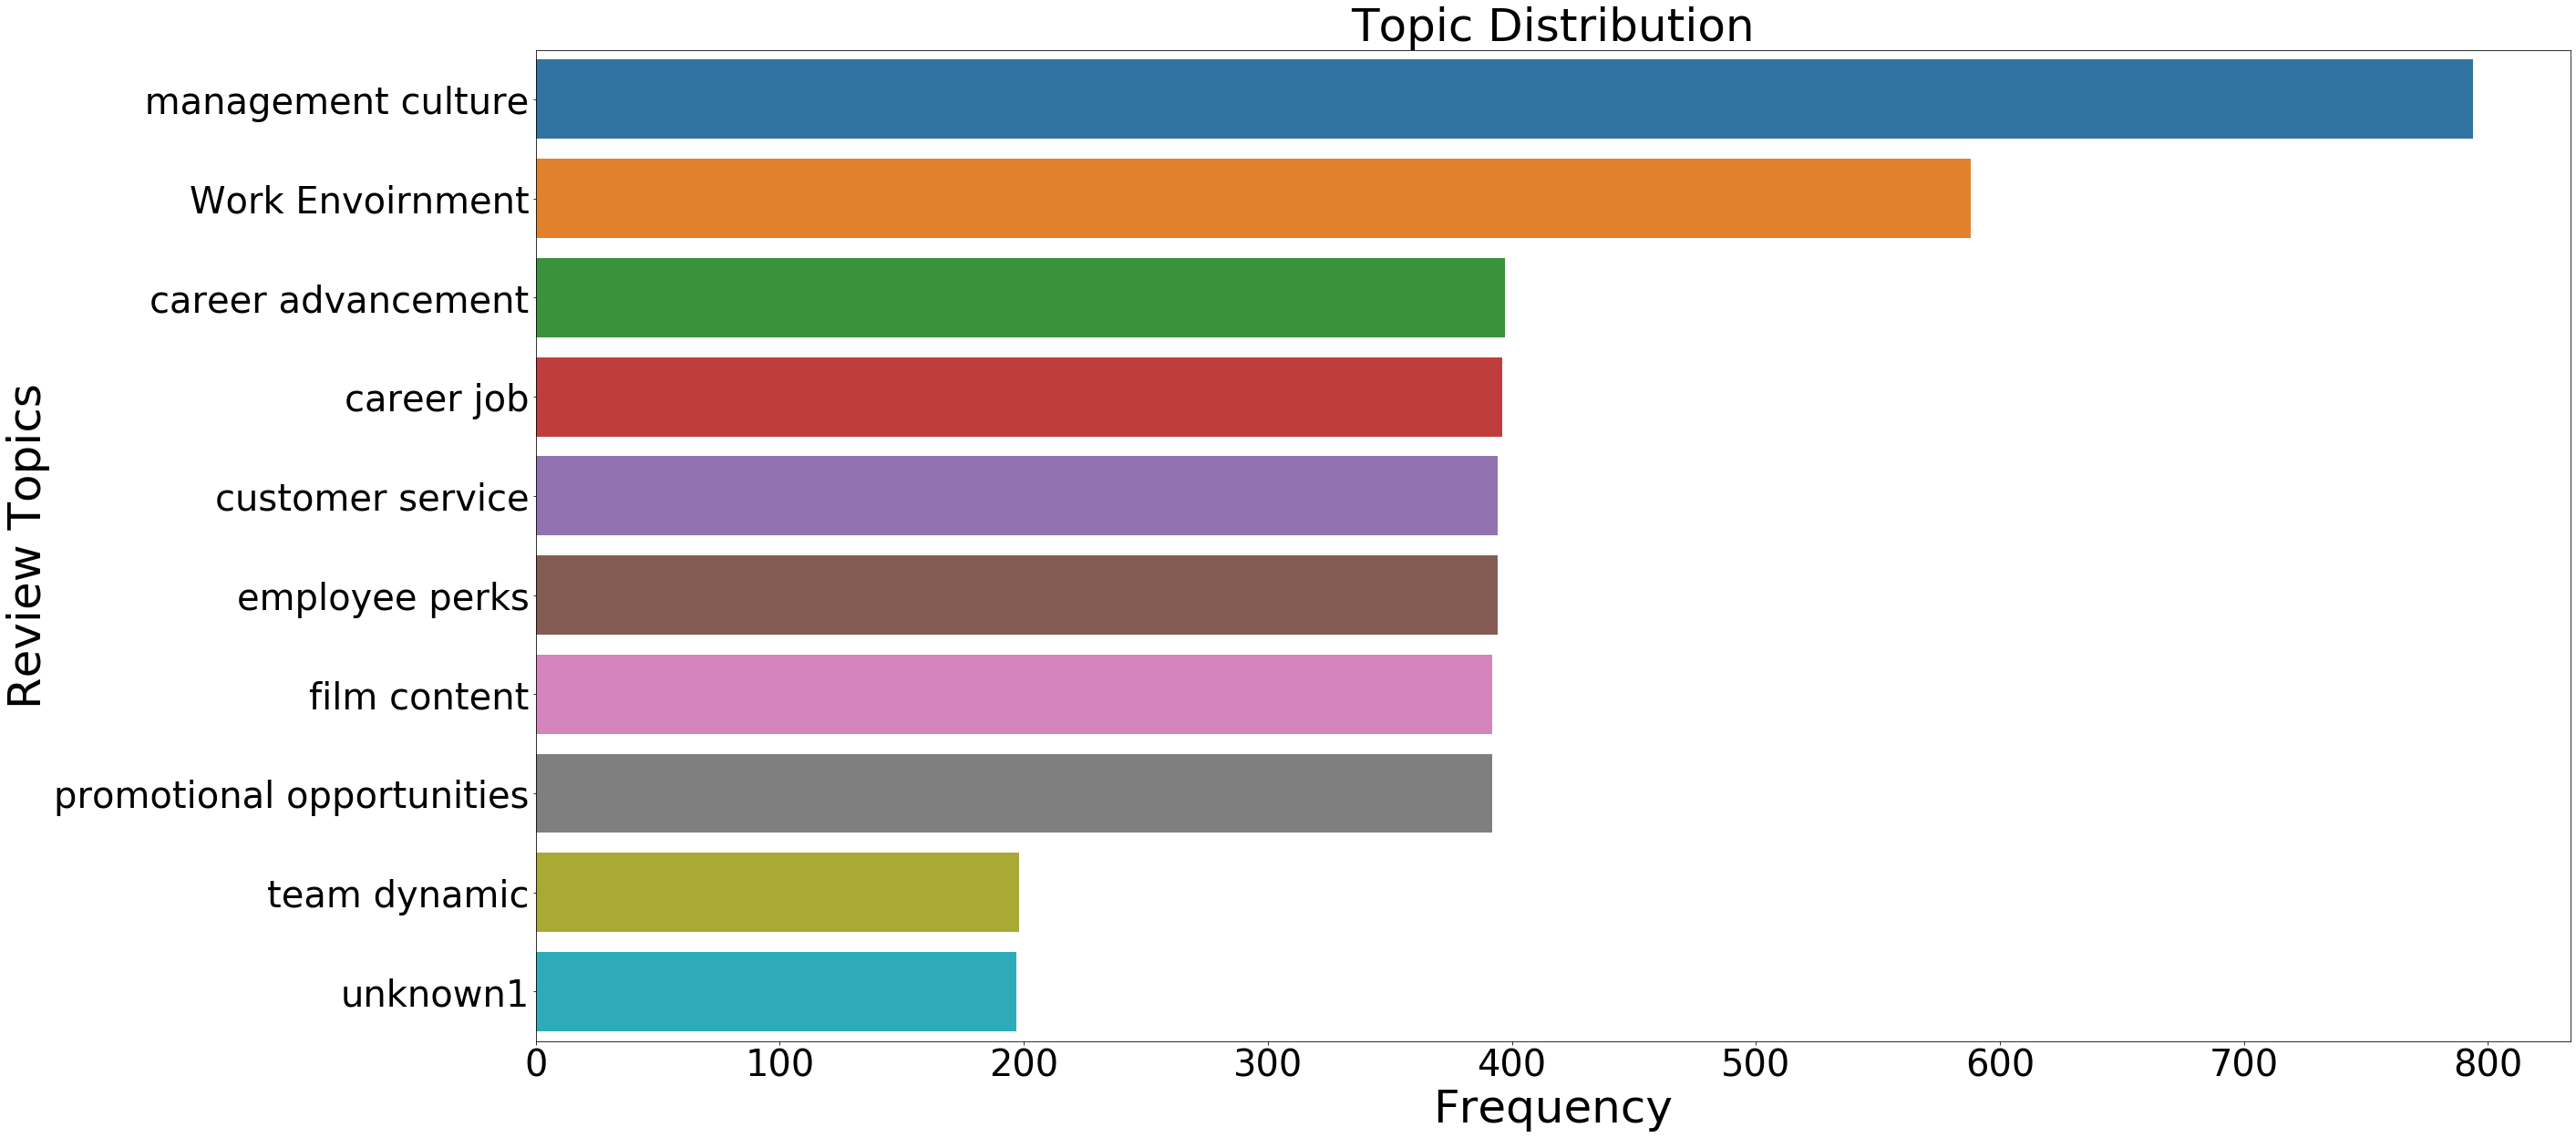

In [73]:
nmf_x = df.nmf_topics.value_counts()
nmf_y = nmf_x.sort_index()
plt.figure(figsize=(40,20))
sns.barplot(nmf_x,nmf_y.index)
plt.title('Topic Distribution', fontsize=50)
plt.ylabel('Review Topics',fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency',fontsize=50)
plt.xticks(fontsize=40)

In [74]:
df_low_ratings=df.loc[(df['rating']==2.0) | (df['rating']==3.0)]

In [75]:
df_low_ratings

,rating,lemmatized,lemma_str,sentiment,sentiments,review_len,word_count,nmf_topics,lda_topics
3,2.0,"[work, culture, change, lot, politics, managem...",work culture change lot politics management un...,0.000000,"{'neg': 0.246, 'neu': 0.599, 'pos': 0.156, 'co...",134,13,promotional opportunities,work envoirnment
4,3.0,"[typical, day, work, company, fast, pace, alwa...",typical day work company fast pace always diff...,0.042424,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",147,16,unknown1,unknown4
18,2.0,"[completely, different, movie, perk, excite, f...",completely different movie perk excite first p...,-0.050000,"{'neg': 0.218, 'neu': 0.563, 'pos': 0.218, 'co...",103,10,promotional opportunities,management culture
24,3.0,"[excellent, learnign, experience, challenge, t...",excellent learnign experience challenge techni...,0.516667,"{'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'comp...",241,23,film content,unknown3
31,3.0,"[google, seem, mostly, hire, temporary, vendor...",google seem mostly hire temporary vendor contr...,0.021667,"{'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'comp...",268,27,career advancement,unknown1
...,...,...,...,...,...,...,...,...,...
4097,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",172,16,unknown1,unknown3
4104,3.0,"[google, seem, mostly, hire, temporary, vendor...",google seem mostly hire temporary vendor contr...,0.021667,"{'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'comp...",268,27,career advancement,unknown1
4118,3.0,"[google, shouldnt, participate, project, drago...",google shouldnt participate project dragonfly ...,0.000000,"{'neg': 0.0, 'neu': 0.653, 'pos': 0.347, 'comp...",172,16,unknown1,unknown3
4125,3.0,"[google, seem, mostly, hire, temporary, vendor...",google seem mostly hire temporary vendor contr...,0.021667,"{'neg': 0.051, 'neu': 0.949, 'pos': 0.0, 'comp...",268,27,career advancement,unknown1


(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 <a list of 10 Text xticklabel objects>)

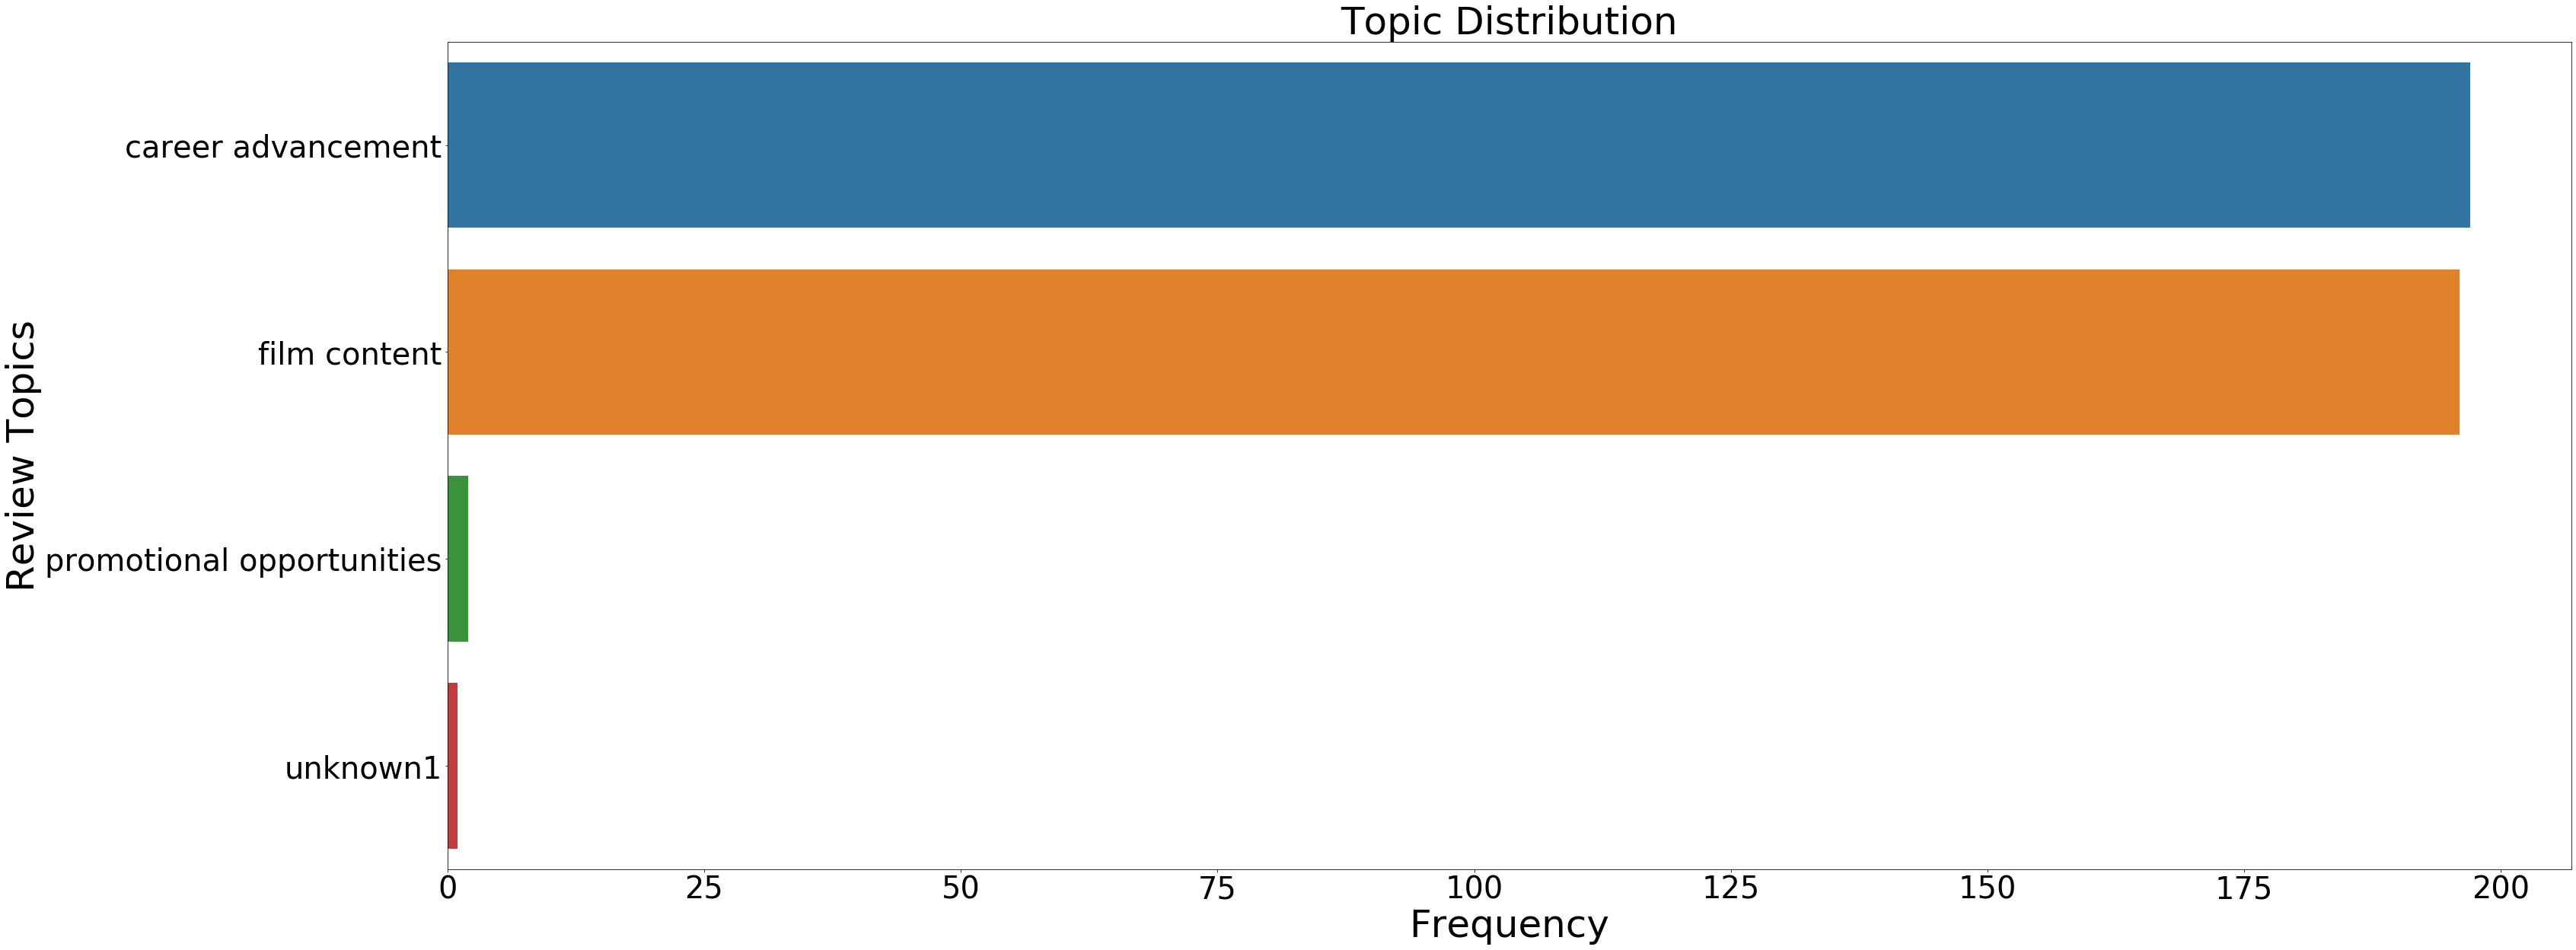

In [76]:
nmf_low_x = df_low_ratings.nmf_topics.value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(50,20))
sns.barplot(nmf_low_x,nmf_low_y.index)
plt.title('Topic Distribution', fontsize=50)
plt.ylabel('Review Topics',fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency',fontsize=50)
plt.xticks(fontsize=40)

In [77]:
df_high_ratings=df.loc[(df['rating']==4.0) | (df['rating']==5.0)]

In [78]:
df_high_ratings

,rating,lemmatized,lemma_str,sentiment,sentiments,review_len,word_count,nmf_topics,lda_topics
0,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",127,12,customer service,management culture
1,5.0,"[customer, service/call, centre, mainly, tech,...",customer service/call centre mainly tech suppo...,0.322222,"{'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'comp...",127,12,customer service,management culture
2,4.0,"[management, great, culture, awesome, people, ...",management great culture awesome people young ...,0.539394,"{'neg': 0.0, 'neu': 0.466, 'pos': 0.534, 'comp...",188,20,promotional opportunities,work envoirnment
5,4.0,"[great, company, work, excellenent, people, wo...",great company work excellenent people wonder f...,0.766667,"{'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...",159,15,employee perks,employee perks
6,5.0,"[google, talented, skilled, caring, people, pa...",google talented skilled caring people passion ...,0.666667,"{'neg': 0.0, 'neu': 0.38, 'pos': 0.62, 'compou...",162,16,employee perks,work envoirnment
...,...,...,...,...,...,...,...,...,...
4136,5.0,"[diligent, customer, service, representative, ...",diligent customer service representative bring...,0.183333,"{'neg': 0.0, 'neu': 0.699, 'pos': 0.301, 'comp...",361,30,customer service,management culture
4137,5.0,"[truly, great, place, work, chef, awesome, guy...",truly great place work chef awesome guy google...,0.866667,"{'neg': 0.0, 'neu': 0.4, 'pos': 0.6, 'compound...",157,17,employee perks,work envoirnment
4138,5.0,"[glad, today, login, herei, like, muchit, ver,...",glad today login herei like muchit ver goodi h...,0.600000,"{'neg': 0.0, 'neu': 0.395, 'pos': 0.605, 'comp...",123,14,unknown1,unknown4
4140,5.0,"[google, awesome, place, work, hour, pretty, t...",google awesome place work hour pretty typical ...,0.122222,"{'neg': 0.101, 'neu': 0.533, 'pos': 0.367, 'co...",208,23,career advancement,unknown4


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

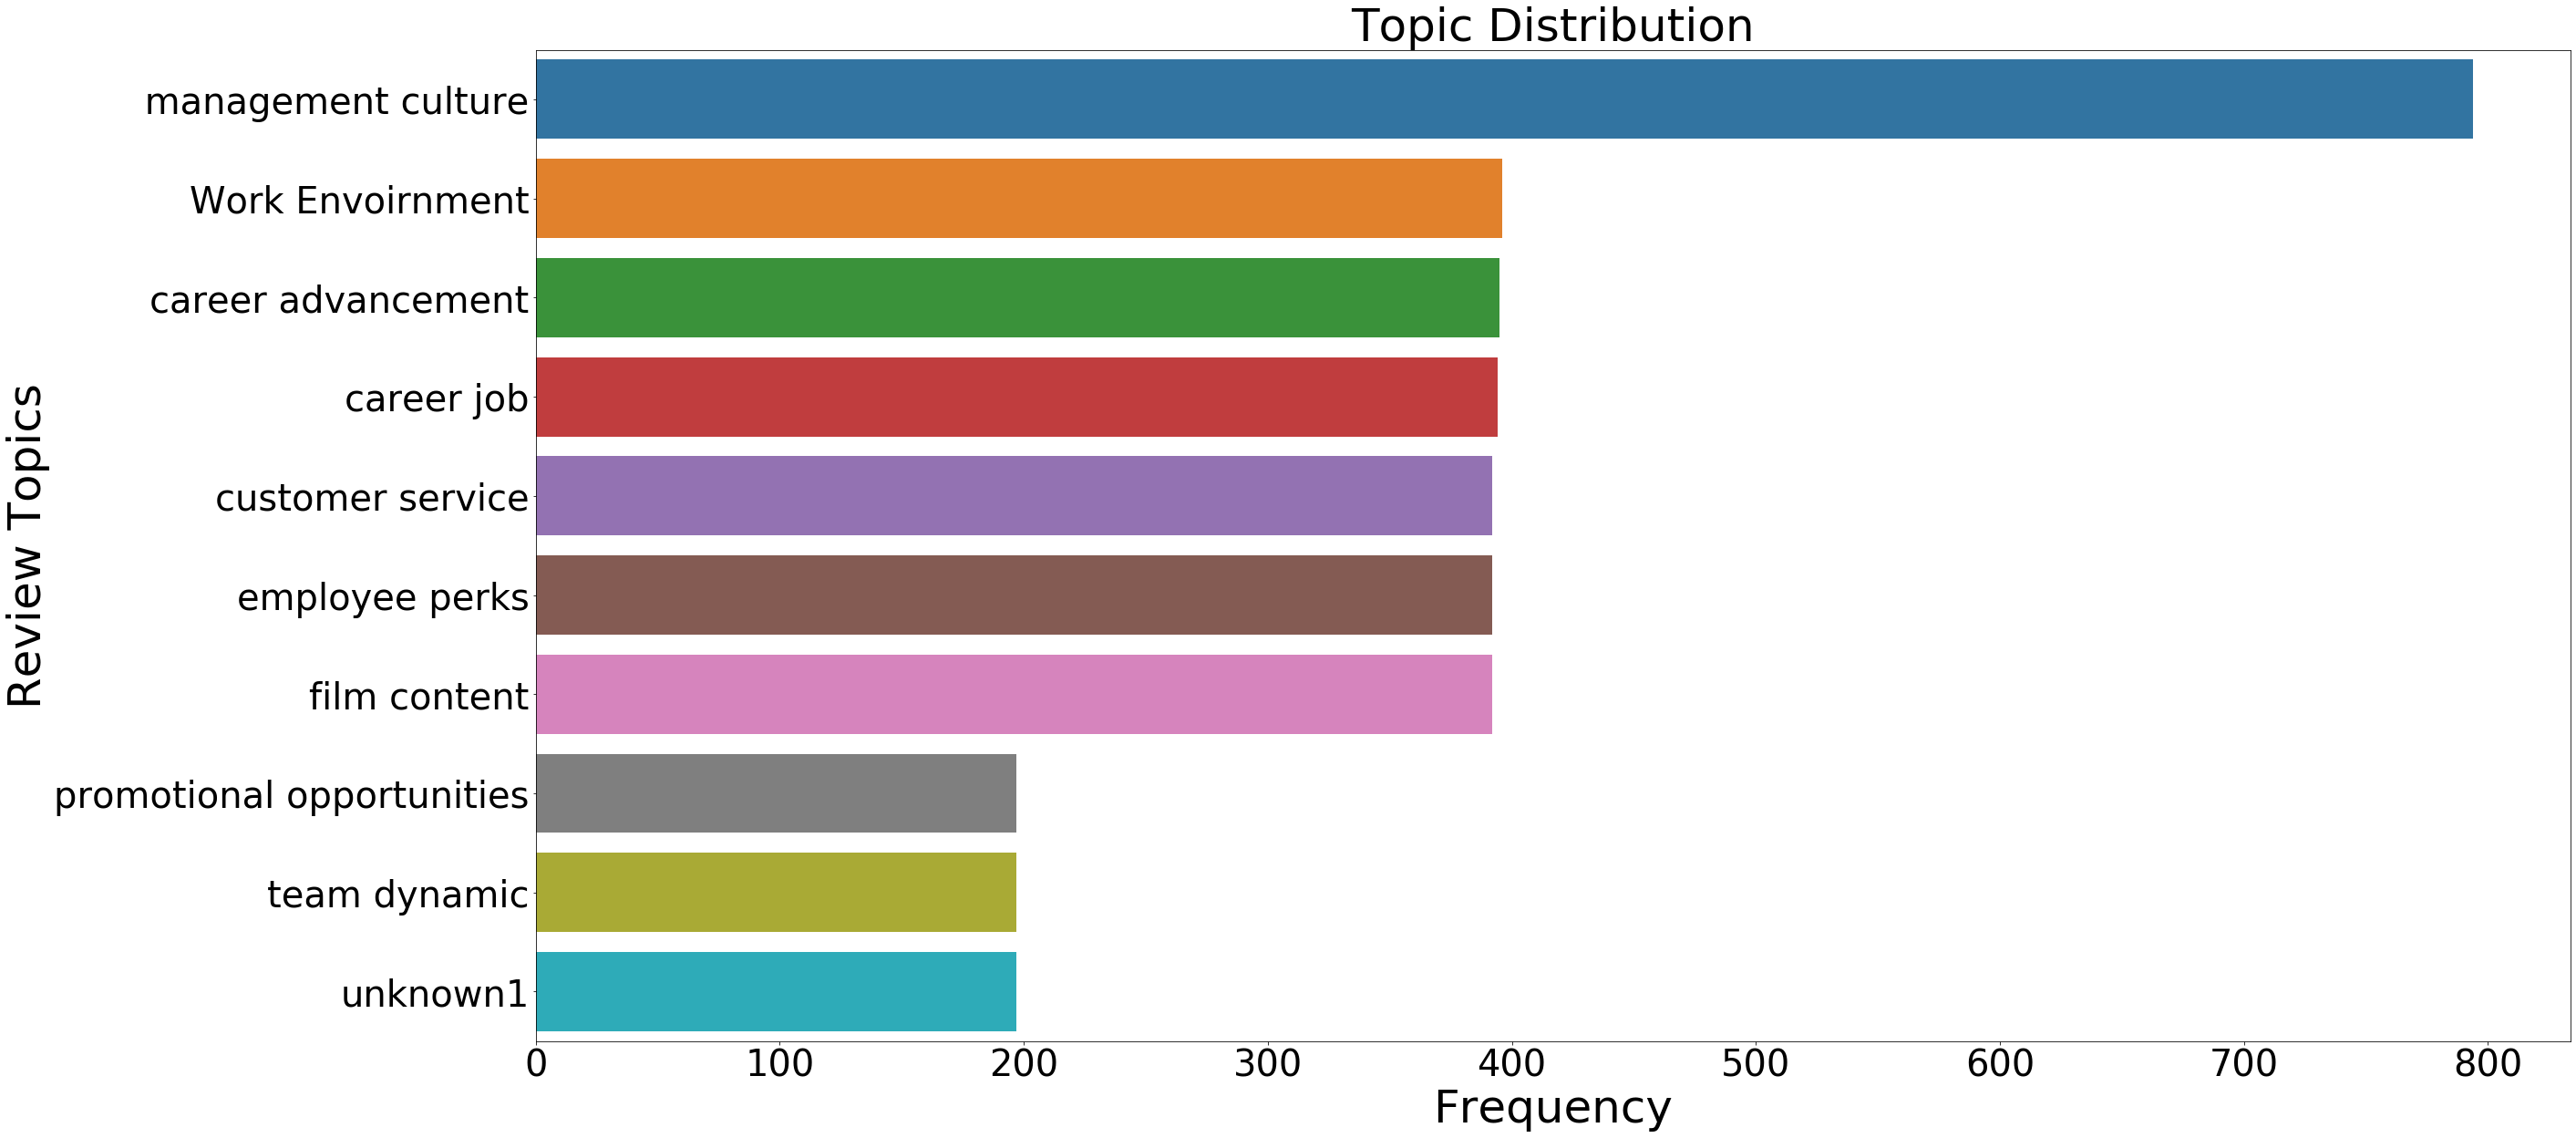

In [79]:
nmf_low_x = df_high_ratings.nmf_topics.value_counts()
nmf_low_y = nmf_low_x.sort_index()
plt.figure(figsize=(40,20))
sns.barplot(nmf_low_x,nmf_low_y.index)
plt.title('Topic Distribution', fontsize=50)
plt.ylabel('Review Topics',fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Frequency',fontsize=50)
plt.xticks(fontsize=40)

# Baseline Model

In [80]:

import numpy as np
cols=['culture', 'company', 'tarun','rating']
#names = list(tfidf_feature_names)
names = list(tfidf_feature_names)

features = doc_term_matrix_tfidf
#y = features['rating']
#X=dataframe[cols]
# Labels are the values we want to predict
labels = np.array(features['rating'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('rating', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


In [81]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.35, random_state = 100000)

In [82]:
len(names)

25

In [83]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2692, 25)
Training Labels Shape: (2692,)
Testing Features Shape: (1450, 25)
Testing Labels Shape: (1450,)


In [84]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators=1000, 
                               random_state=50, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)
# Train the model on training data
rf.fit(train_features, train_labels)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    1.3s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [85]:
rf_predictions = rf.predict(test_features)
rf_probs = rf.predict_proba(test_features)[:, 1]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [86]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

In [87]:
from sklearn.metrics import classification_report
sk_report = classification_report(
    digits=6,
    y_true=test_labels, 
    y_pred=rf.predict(test_features))
print(sk_report)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

         2.0   0.000000  0.000000  0.000000         1
         3.0   1.000000  0.993243  0.996610       148
         4.0   0.990385  0.990385  0.990385       208
         5.0   0.998174  1.000000  0.999086      1093

    accuracy                       0.997241      1450
   macro avg   0.747140  0.745907  0.746520      1450
weighted avg   0.996554  0.997241  0.996896      1450



[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
baseline_preds = test_features[:, feature_list.index('well')]
# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  4.56


In [89]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s


Mean Absolute Error: 0.0 degrees.


[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:    0.2s finished


In [90]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.87 %.
